This is a notebook for looking at shakedown data, specifically S1342+5324 (task id 181012016). I am running everything on happili-02 (my assigned happili).

In [1]:
#load apercal automatically, not needing to specify my username/path directly
import os;
myusername = os.environ['USER']
if not ('PYTHONPATH' in os.environ and
        '/home/' + myusername + '/apercal' in os.environ['PYTHONPATH']):
      print("WARNING: your apercal directory should be in the $PYTHONPATH")

In [2]:
#set up logging
%config IPCompleter.greedy=True
%matplotlib notebook
import libs.lib as lib
lib.setup_logger('info', logfile='/home/{}/shakedown/logs/S1342+5324.log'.format(myusername))

root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adams/shakedown/logs/S1342+5324.log


Setup logger with lib.setup_logger()


In [3]:
import apercal

In [4]:
#import other modules
from timeit import default_timer as timer  #so I can time things
import casacore.tables as pt
import glob
import numpy as np

import libs.lib as lib
import subs.readmirlog
import numpy as np
from matplotlib import pyplot as plt
import subs
import os,string,sys

import shutil
from IPython.display import Image
from IPython.display import display

import pyaml, json
from astropy.io import ascii

import rfinder as rfinder
import rfi
import rfinder_plots as rfi_pl


In [5]:
cfgfile ='/home/{}/shakedown/cfg/S1342+5324.cfg'.format(myusername)

Inspection plots of data:
- 3C147 (fluxcal, 181012015): https://apertifsurveys.wordpress.com/2018/10/14/181012015/

- 3C138 (polcal, 181012014): https://apertifsurveys.wordpress.com/2018/10/14/181012014/

- S1342+5324 (target, 181012016): https://apertifsurveys.wordpress.com/2018/10/15/181012016/

In [6]:
prepare = apercal.prepare(cfgfile)
prepare.show()

PREPARE - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


PREPARE
	prepare_date = 181012
	prepare_obsnum_fluxcal = 015
	prepare_obsnum_polcal = 014
	prepare_obsnum_target = 016
	prepare_target_beams = all


In [7]:
start = timer()
prepare.go()
end = timer()
print 'Elapsed time for prepare to copy data is {} minutes'.format((end - start)/60.) #time in minutes


PREPARE - INFO : ########## Preparing data for calibration ##########


# Parameter prepare_fluxcal_requested found in cache (param.npy). #
# Parameter prepare_polcal_requested found in cache (param.npy). #
# Parameter prepare_targetbeams_requested found in cache (param.npy). #
# Parameter prepare_fluxcal_diskstatus found in cache (param.npy). #
# Parameter prepare_polcal_diskstatus found in cache (param.npy). #
# Parameter prepare_targetbeams_diskstatus found in cache (param.npy). #
# Parameter prepare_fluxcal_altastatus found in cache (param.npy). #
# Parameter prepare_polcal_altastatus found in cache (param.npy). #
# Parameter prepare_targetbeams_altastatus found in cache (param.npy). #
# Parameter prepare_fluxcal_copystatus found in cache (param.npy). #
# Parameter prepare_polcal_copystatus found in cache (param.npy). #
# Parameter prepare_targetbeams_copystatus found in cache (param.npy). #
# Parameter prepare_fluxcal_rejreason found in cache (param.npy). #
# Parameter prepare_polcal_rejreason found in cache (param.npy). #
# Parameter prepare_targetbe

GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root - INFO : Beams: [0]
GET_ALTA - INFO : ###### Processing beam 000... ######
GET_ALTA - INFO : Processing task ID 015...
GET_ALTA - INFO : iget -rfPIT -X ./WSRTA181012015_B000-icat.irods-status --lfrestart ./WSRTA181012015_B000-icat.lf-irods-status --retries 5 /altaZone/archive/apertif_main/visibilities_default/181012015/WSRTA181012015_B000.MS /data/adams/apertif/shakedown_S1342+5324/00/raw/3C147.MS/
GET_ALTA - INFO : ###### Verifying beam 000... ######
GET_ALTA - INFO : Verifying task ID 015...
GET_ALTA - INFO : Checking failed files for task ID 015...
GET_ALTA - WARNING : Failed files: 70
GET_ALTA - INFO : Total time to transfer data: 0.18 min
GET_ALTA - INFO : ########## Done getting data from ALTA ##########
GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root - INFO : Beams: [0]
GET_ALTA - INFO : ###### Processing beam 000... ######
GET_ALTA - INFO : Processing task ID 014...
GET_ALTA - IN

GET_ALTA - INFO : ###### Verifying beam 008... ######
GET_ALTA - INFO : Verifying task ID 016...
GET_ALTA - INFO : Checking failed files for task ID 016...
GET_ALTA - WARNING : Failed files: 630
GET_ALTA - INFO : Total time to transfer data: 2.72 min
GET_ALTA - INFO : ########## Done getting data from ALTA ##########
GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root - INFO : Beams: [9]
GET_ALTA - INFO : ###### Processing beam 009... ######
GET_ALTA - INFO : Processing task ID 016...
GET_ALTA - INFO : iget -rfPIT -X ./WSRTA181012016_B009-icat.irods-status --lfrestart ./WSRTA181012016_B009-icat.lf-irods-status --retries 5 /altaZone/archive/apertif_main/visibilities_default/181012016/WSRTA181012016_B009.MS /data/adams/apertif/shakedown_S1342+5324/09/raw/S1342+5324.MS/
GET_ALTA - INFO : ###### Verifying beam 009... ######
GET_ALTA - INFO : Verifying task ID 016...
GET_ALTA - INFO : Checking failed files for task ID 016...
GET_ALTA - WARNING : Failed files: 700
GET_A

GET_ALTA - INFO : Total time to transfer data: 2.49 min
GET_ALTA - INFO : ########## Done getting data from ALTA ##########
GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root - INFO : Beams: [19]
GET_ALTA - INFO : ###### Processing beam 019... ######
GET_ALTA - INFO : Processing task ID 016...
GET_ALTA - INFO : iget -rfPIT -X ./WSRTA181012016_B019-icat.irods-status --lfrestart ./WSRTA181012016_B019-icat.lf-irods-status --retries 5 /altaZone/archive/apertif_main/visibilities_default/181012016/WSRTA181012016_B019.MS /data/adams/apertif/shakedown_S1342+5324/19/raw/S1342+5324.MS/
GET_ALTA - INFO : ###### Verifying beam 019... ######
GET_ALTA - INFO : Verifying task ID 016...
GET_ALTA - INFO : Checking failed files for task ID 016...
GET_ALTA - WARNING : Failed files: 1400
GET_ALTA - INFO : Total time to transfer data: 2.56 min
GET_ALTA - INFO : ########## Done getting data from ALTA ##########
GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root 

root - INFO : Beams: [29]
GET_ALTA - INFO : ###### Processing beam 029... ######
GET_ALTA - INFO : Processing task ID 016...
GET_ALTA - INFO : iget -rfPIT -X ./WSRTA181012016_B029-icat.irods-status --lfrestart ./WSRTA181012016_B029-icat.lf-irods-status --retries 5 /altaZone/archive/apertif_main/visibilities_default/181012016/WSRTA181012016_B029.MS /data/adams/apertif/shakedown_S1342+5324/29/raw/S1342+5324.MS/
GET_ALTA - INFO : ###### Verifying beam 029... ######
GET_ALTA - INFO : Verifying task ID 016...
GET_ALTA - INFO : Checking failed files for task ID 016...
GET_ALTA - WARNING : Failed files: 2100
GET_ALTA - INFO : Total time to transfer data: 2.59 min
GET_ALTA - INFO : ########## Done getting data from ALTA ##########
GET_ALTA - INFO : ########## Start getting data from ALTA ##########
root - INFO : Beams: [30]
GET_ALTA - INFO : ###### Processing beam 030... ######
GET_ALTA - INFO : Processing task ID 016...
GET_ALTA - INFO : iget -rfPIT -X ./WSRTA181012016_B030-icat.irods-status 

Elapsed time for prepare to copy data is 123.976162032 minutes


In [55]:
#the crucial next step is to update header coordinates for everything
#do this using pyrap - can check and confirm what I do
#then recalculate uvcoords

#load preflag module - use for defining paths and such
preflag = apercal.preflag(cfgfile)

#write a short little function that will take phasedir and format it nicely in RA,Dec
def format_phasedir(dir):
    #takes t_field[0]["PHASE_DIR"]
    ra_deg = dir[0,0] * 180./np.pi
    if ra_deg <0:
        ra_deg = ra_deg+360.
    dec_deg = dir[0,1]*180./np.pi
    rahr =int( np.floor(ra_deg/15.))
    ram = int(np.floor((ra_deg/15.-rahr)*60.))
    ras = ((ra_deg/15.-rahr)*60. - ram)*60.
    decd = int(np.floor(dec_deg))
    decm = int(np.floor( (dec_deg - decd)*60. ))
    decs =int( ( (dec_deg - decd)*60.  - decm )*60.)
    string = '{0:d}:{1:d}:{2:.1f} {3:d}:{4:d}:{5:d}'.format(rahr,ram,ras,decd,decm,decs)
    return string



"""
Three direction fields:
DELAY_DIR Direction in which delay compensation was done
PHASE_DIR Direction used for calculating uv coords (beam pointing) --
            this is the one that needs to be updated!
REFERENCE_DIR Direction of the telescope pointing (B000)

Will only change PHASE_DIR, reflecting around REFERENCE_DIR
By not touching DELAY_DIR, can always recover to beginning 
Plus, that is the actual direction in which delay tracking was done
"""
beam='00'
msfile = preflag.basedir +beam+'/raw/'+preflag.target
t_field = pt.table(msfile+"::FIELD", readonly=True) #open measurement set
print 'The reference phase direction is {}'.format(format_phasedir(phasedir))

start = timer() #start a timer

for i in xrange(1,2):  #loop over beams, can skip first beam (no update needed)
    beam = '{0:02d}'.format(i)   #format beam number into string
    msfile = preflag.basedir +beam+'/raw/'+preflag.target  #define path to MS
    t_field = pt.table(msfile+"::FIELD", readonly=False)  #open MS for writing
    phasedir=t_field[0]["PHASE_DIR"]  #get the phasedir
    delaydir = t_field[0]["DELAY_DIR"] #get the delaydir, what I actually want to use for updating phase_dir
    refdir = t_field[0]["REFERENCE_DIR"] #get the reference dir, to reflect phasedir around
    newphasedir = np.copy(phasedir)
    newphasedir[0,0] = delaydir[0,0]+2*(refdir[0,0]-delaydir[0,0])  #reflect the delaydir around refdir to get new phasedir coord
    #print newphasedir,phasedir
    string_old = format_phasedir(phasedir)
    string_new = format_phasedir(newphasedir)
    print 'For beam {0} the old phase direction was {1} and the new phase direction is {2}'.format(beam,string_old,string_new)
    print ''
    #if run for first time, old phase and new phase should be different, and reflected around reference dir (printed before loop)
    #if run for second or greater time, old phase and new phase should be the same.
    
    #do the actual update
    t_field.putcell("PHASE_DIR", 0, newphasedir)  #update the phase direction
    t_field.flush() #make sure changes are written to MS
    
    pt.taql('update {0} set UVW = mscal.newuvw()'.format(msfile))  #recalculate uv coordinates
    

end = timer()
print 'Elapsed time for to recalculate uv coordinates is {} minutes'.format((end - start)/60.) #time in minutes

PREFLAG - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
13:42:41.4 53:24:5
The reference phase direction is 13:42:41.4 53:24:5
Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/01/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 01 the old phase direction was 13:32:43.7 52:21:42 and the new phase direction is 13:52:39.1 52:21:42
Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/02/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 02 the old phase direction was 13:49:35.3 52:22:32 and the new phase direction is 13:35:47.5 52:22:32
Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/03/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 03 the old phase direction was 13:46:31.4 52:23:3 and the new phase direction is 13:38:51.4 52:23:3
Successful read/write open of default-lock

In [56]:
#Do a quick check and compare delay dir to phase dir for each beam
#If things are updated properly, they should no longer be the same
#and should be reflected around reference direction

beam='00'
msfile = preflag.basedir +beam+'/raw/'+preflag.target
t_field = pt.table(msfile+"::FIELD", readonly=True) #open measurement set
print 'The reference phase direction is {}'.format(format_phasedir(phasedir))


for i in xrange(1,37):
    beam = '{0:02d}'.format(i)
    #define msfile:
    msfile = preflag.basedir +beam+'/raw/'+preflag.target
    t_field = pt.table(msfile+"::FIELD", readonly=True) #open just for reading
    phasedir=t_field[0]["PHASE_DIR"] #get phasedir
    delaydir = t_field[0]["DELAY_DIR"] #get delay dir
    string_phase = format_phasedir(phasedir)
    string_delay = format_phasedir(delaydir)
    print 'For beam {0} the phase direction is {1} and the delay direction is {2}'.format(beam,string_phase,string_delay)
    print ''
    #if update was successful, these should be different, reflected around reference direction (printed at beginning)

Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/01/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 01 the phase direction is 13:52:39.1 52:21:42 and the delay direction is 13:52:39.1 52:21:42

Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/02/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 02 the phase direction is 13:35:47.5 52:22:32 and the delay direction is 13:49:35.3 52:22:32

Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/03/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 03 the phase direction is 13:38:51.4 52:23:3 and the delay direction is 13:46:31.4 52:23:3

Successful read/write open of default-locked table /data/adams/apertif/shakedown_S1342+5324/04/raw/S1342+5324.MS::FIELD: 9 columns, 1 rows
For beam 04 the phase direction is 13:41:55.4 52:23:16 and the delay direction is 13:43:27.4 52:23:16

Successful read/write open of defa

PREFLAG - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###
rfinder - INFO : 	 ... Reading parameter file ... 

rfinder - INFO :  ------ STARTING RFI analysis ------

rfi - INFO : 	 ... Field, Antenna & Bandwidth Info ...

rfi - INFO : 	Field with name S1342+5324 (Field ID = 0)
rfi - INFO : 	Total number of antennas:	12
rfi - INFO : 	Antenna names:		[ 0  1  2  3  4  5  6  7  8  9 10 11]
rfi - INFO : 	Channel Width [kHz]:	12.20703125
rfi - INFO : 	Start         [GHz]:	1.249609375
rfi - INFO : 	End           [GHz]:	1.44959716797

rfinder_stats - INFO : 	 ...  Observing time Info ... 



{'plots': {'movies': {'movies_in_report': False, '2d_gif': False, '__helpstr': 'make movies of output plots', 'altaz_gif': False, '1d_gif': False}, 'enable': True, 'plot_noise': 'rfi', '__helpstr': 'plot rfi over different axes', 'plot_long_short': True}, 'rfi': {'enable': True, 'baseline_cut': 200, '__helpstr': 'Find RFI in msfile over threshold', 'bad_antenna': '[]', 'rms_clip': 5, 'polarization': 'q', 'RFInder_mode': 'rms_clip', 'noise_measure_edges': ['1.420e9', '1.427e9'], 'chunks': {'time_enable': False, 'time_step': 10, 'spw_enable': True, '__helpstr': 'separate visibilities in small time intervals and/or larger spectral windows', 'spw_width': 20}, 'telescope': 'apertif'}, 'beam_shape': {'enable': False, '__helpstr': 'estimate beam shape after RFI flagging'}, 'general': {'moviedir': '/home/adams/rfirfi_q/plots/movies/', 'workdir': '/data/adams/apertif/shakedown_S1342+5324/00/raw/', '__helpstr': 'General INPUT directories and filenames', 'tabledir': '/home/adams/rfirfi_q/tables/'

rfinder_stats - INFO : 	 Start date: 18Oct13:06:04:15
rfinder_stats - INFO : 	 End date  : 18Oct13:17:33:55 


rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 



rows
Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS: 23 columns, 105144 rows


rfinder_stats - INFO : 		 ... Altitude = [41.46909026] deg
rfinder_stats - INFO : 		 ... Azimuth = [52.73099086] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ...  Predicting natural r.m.s. ... 

rfinder_stats - INFO : 	 Assumptions on apertif telescope
rfinder_stats - INFO : 		Dish diameter = 25.0 m
rfinder_stats - INFO : 		 ... and SEFD = 523.131552 Jy
rfinder_stats - INFO : 		 ... and Tsys = 93.0 K
rfinder_stats - INFO : 	 Properties of observation
rfinder_stats - INFO : 		 Total number of baselines = 66.0
rfinder_stats - INFO : 		 Total number of channels = 16384
rfinder_stats - INFO : 		 Observing time on source = 11.50293 h (2 polarisations)

rfinder_stats - INFO : 	 Stokes I natural r.m.s.       = 1.432e+00 mJy/b 
rfinder_stats - INFO : 	 ... Natural r.m.s. predicted ... 

rfi - INFO : 	 ... info from MS file loaded  


rfinder - INFO : ---- MSfile Loaded -----

rfi - INFO : 	 ... Sorting baselines ... 

rfinder_stats - INFO : 	 ... Baseline info .

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [80.27405445] deg
rfinder_stats - INFO : 		 ... Azimuth = [81.18169293] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [81.76902044] deg
rfinder_stats - INFO : 		 ... Azimuth = [81.76285903] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [83.26586486] deg
rfinder_stats - INFO : 		 ... Azimuth = [82.15256958] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [84.76355629] deg
rfinder_stats - INFO : 		 ... Azimuth = [82.18830772] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [46.3549015] deg
rfinder_stats - INFO : 		 ... Azimuth = [302.66413562] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [45.09059135] deg
rfinder_stats - INFO : 		 ... Azimuth = [303.81428636] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [43.8432535] deg
rfinder_stats - INFO : 		 ... Azimuth = [304.97601626] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [42.61357473] deg
rfinder_stats - INFO : 		 ... Azimuth = [306.14951578] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinde

<IPython.core.display.Javascript object>


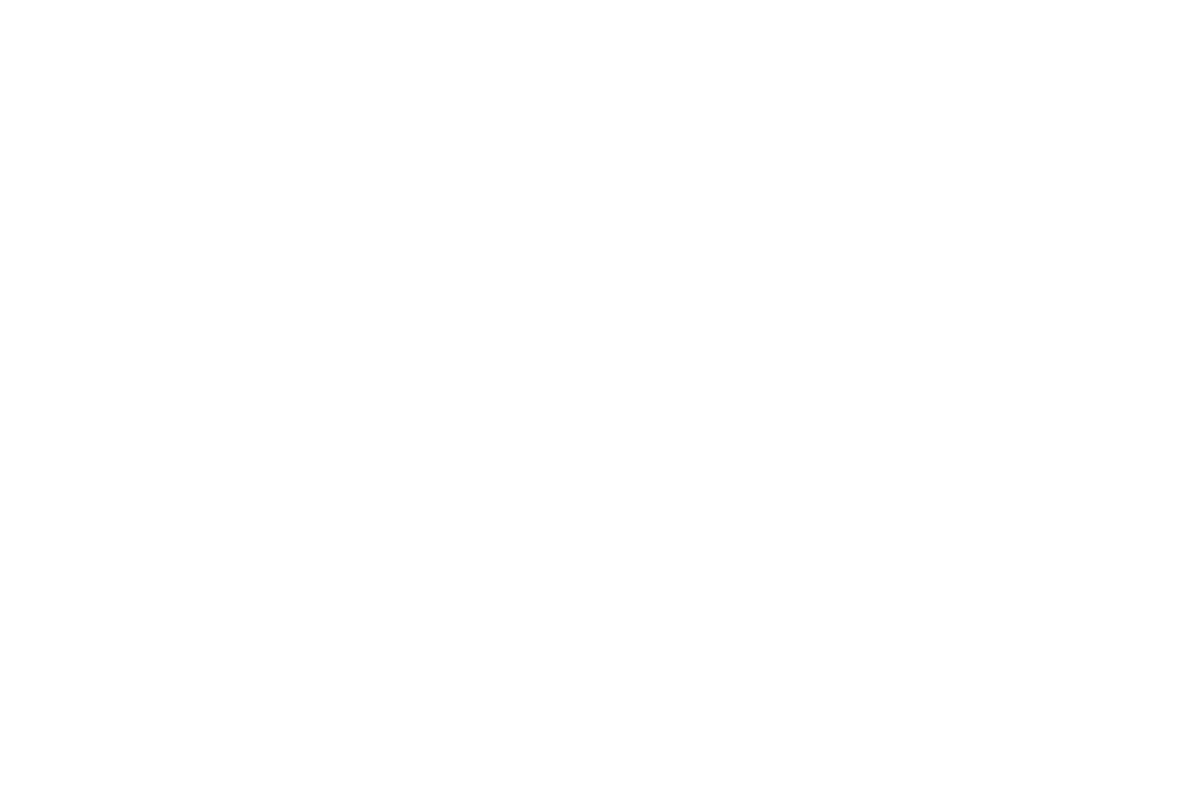

rfinder_plots - INFO : 	 ... ALT/AZ for S1342+5324 ...

rfinder - INFO : ---- Alt/Az plotted ----

rfinder_plots - INFO : 	 ... Plotting RFI in 2D ... 



<IPython.core.display.Javascript object>


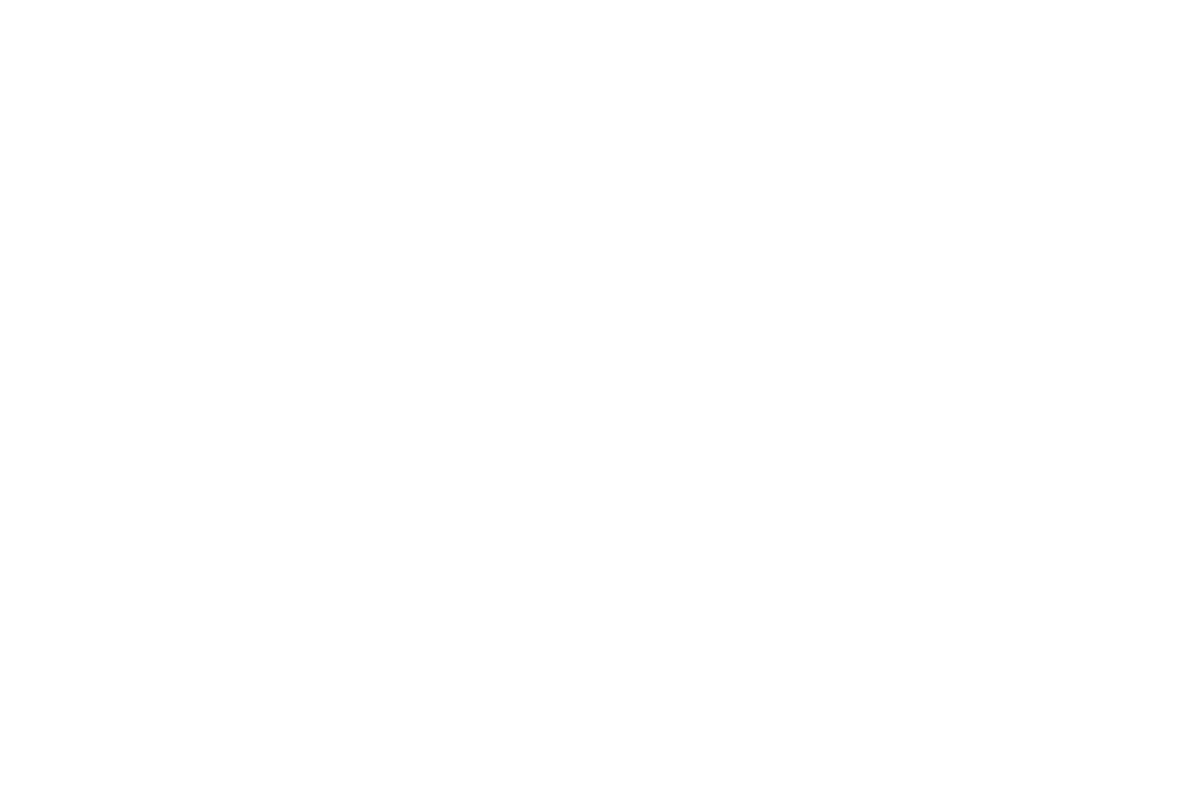

rfinder_plots - INFO : 	 ... RFI per baseline lenght and frequency plotted ... 


rfinder - INFO : ---- RFI in 2D plotted ----

rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting percentage of flagged RFI per frequency channel ...


<IPython.core.display.Javascript object>


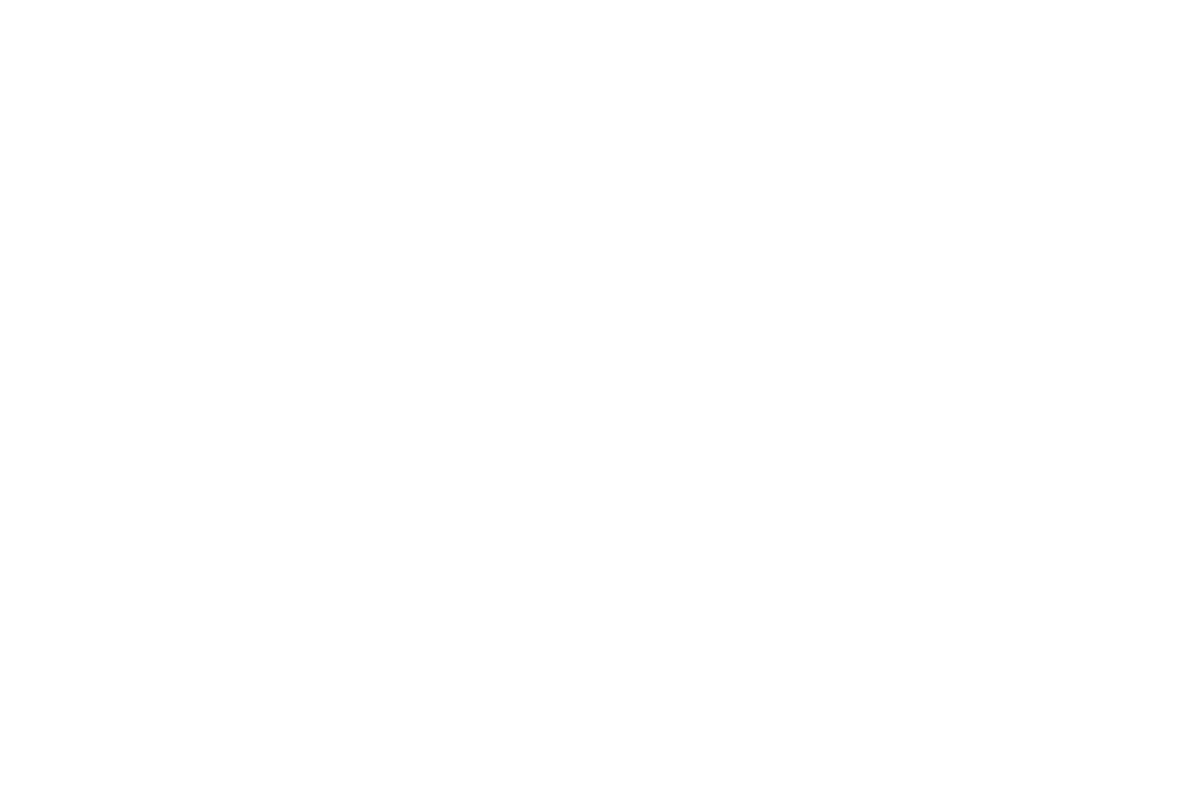

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting percentage of flagged RFI per frequency channel ...


<IPython.core.display.Javascript object>


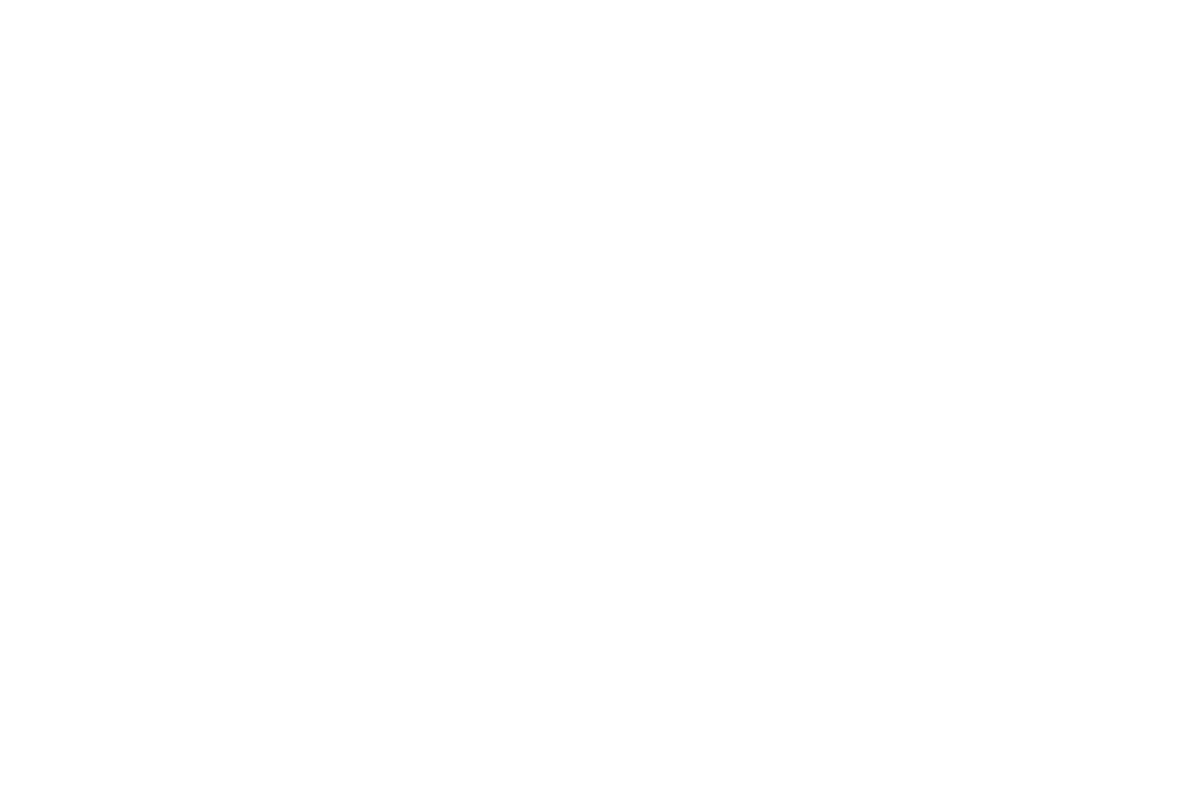

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting factor of noise increas per frequency channel ...


<IPython.core.display.Javascript object>


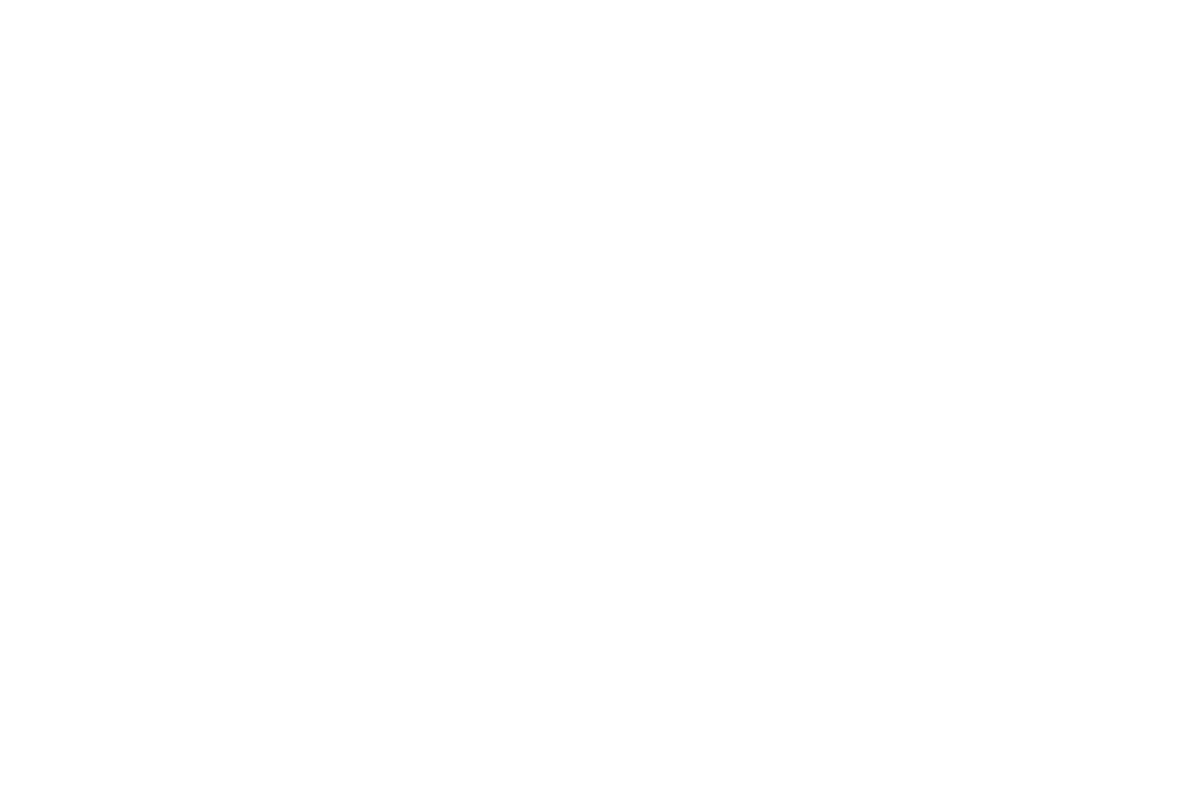

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 



<IPython.core.display.Javascript object>


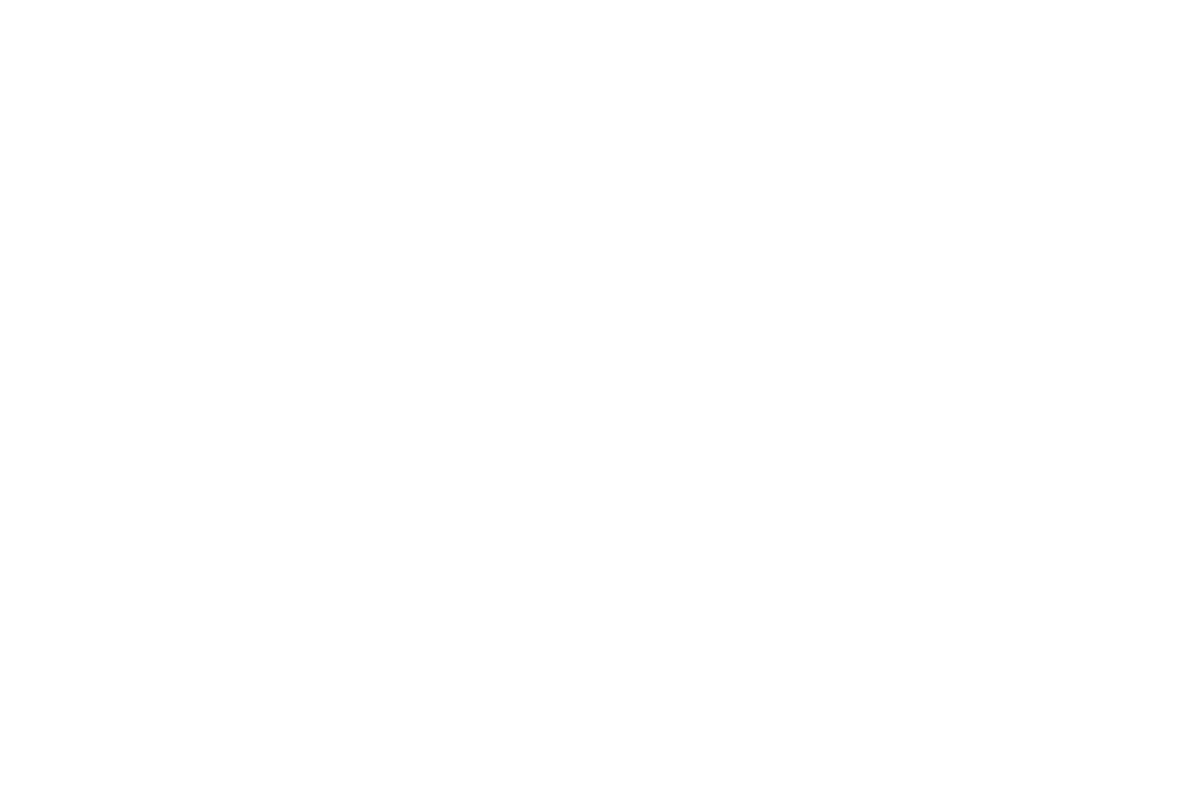

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder - INFO : ---- RFI in 1D plotted ----

rfinder - INFO :  ------ End of RFInder ------ 




	+------+
	 Html report done 
	+------+
	+------+
	 Done 
	+------+


In [8]:
#before doing the flagging, want to try the RFInder module to get a sense of the data quality
#load preflag for paths and such
preflag = apercal.preflag(cfgfile)


# get parameters and run the RFInder module
rfi_par = rfinder.rfinder('/home/adams/rfinder_default.yml')

# Set working directory & filenames
#rfi_par.cfg_par['general']['workdir'] = '/home/vdhulst/Data/A0030+50/00/raw/'
rfi_par.cfg_par['general']['workdir'] = preflag.rawdir+'/' #look at central beam, add trailing slash
# Enable / disable modules
rfi_par.cfg_par['rfi']['enable'] = True
rfi_par.cfg_par['beam_shape']['enable'] = False
rfi_par.cfg_par['plots']['enable'] = True
# MS file
rfi_par.cfg_par['general']['msname'] = [preflag.target]

rfi_par.set_dirs()
# print parameters
print rfi_par.cfg_par

#run rfinder
run = rfi_par.go(rfi_par.cfg_par)

if run == 0: 
    print '\t+------+\n\t Done \n\t+------+'

/home/adams/rfirfi_q/plots/rfi_base_full.png


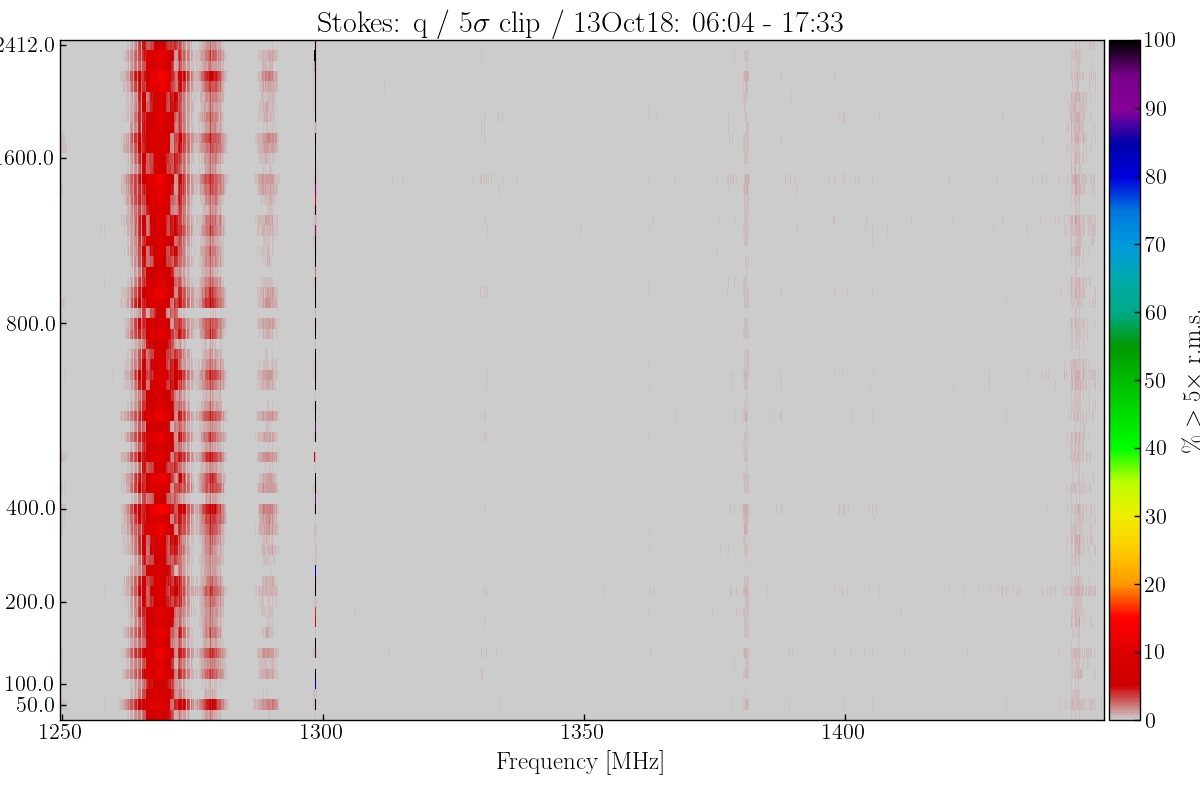

/home/adams/rfirfi_q/plots/flags_full_sl_rfi.png


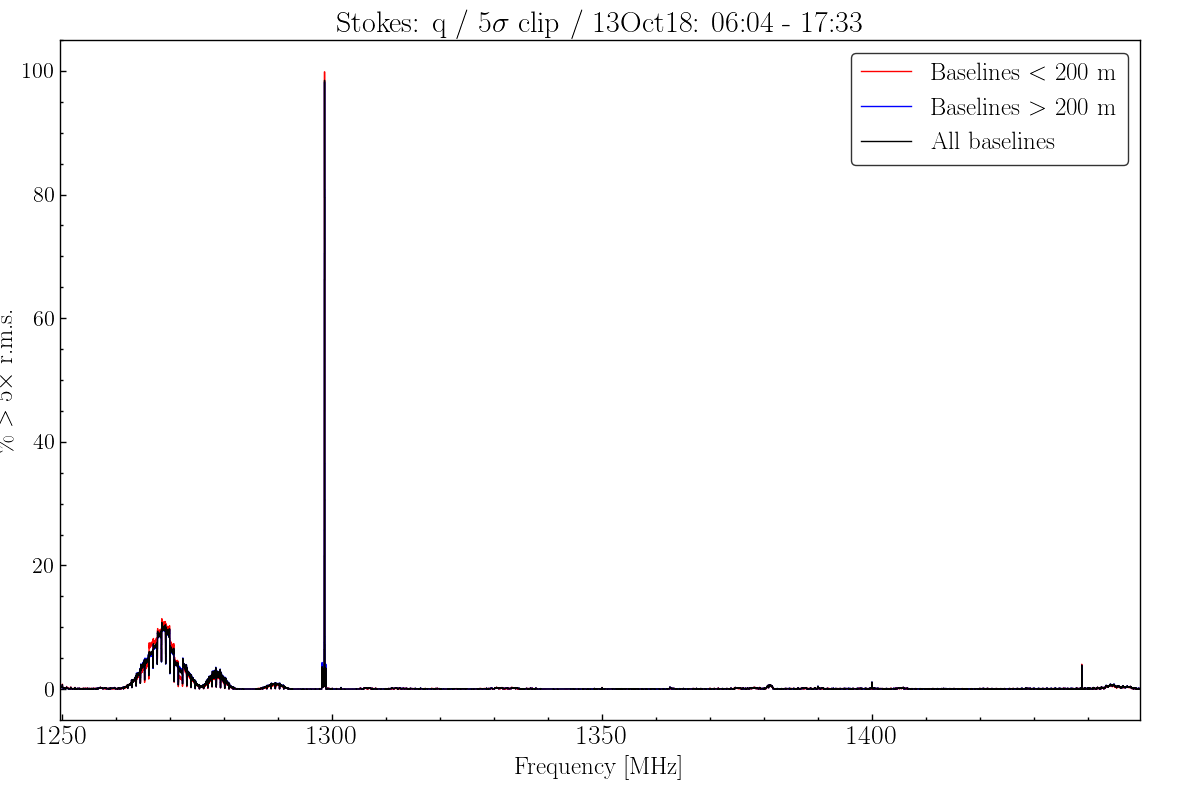

/home/adams/rfirfi_q/plots/noisefactor_full_sl_rfi.png


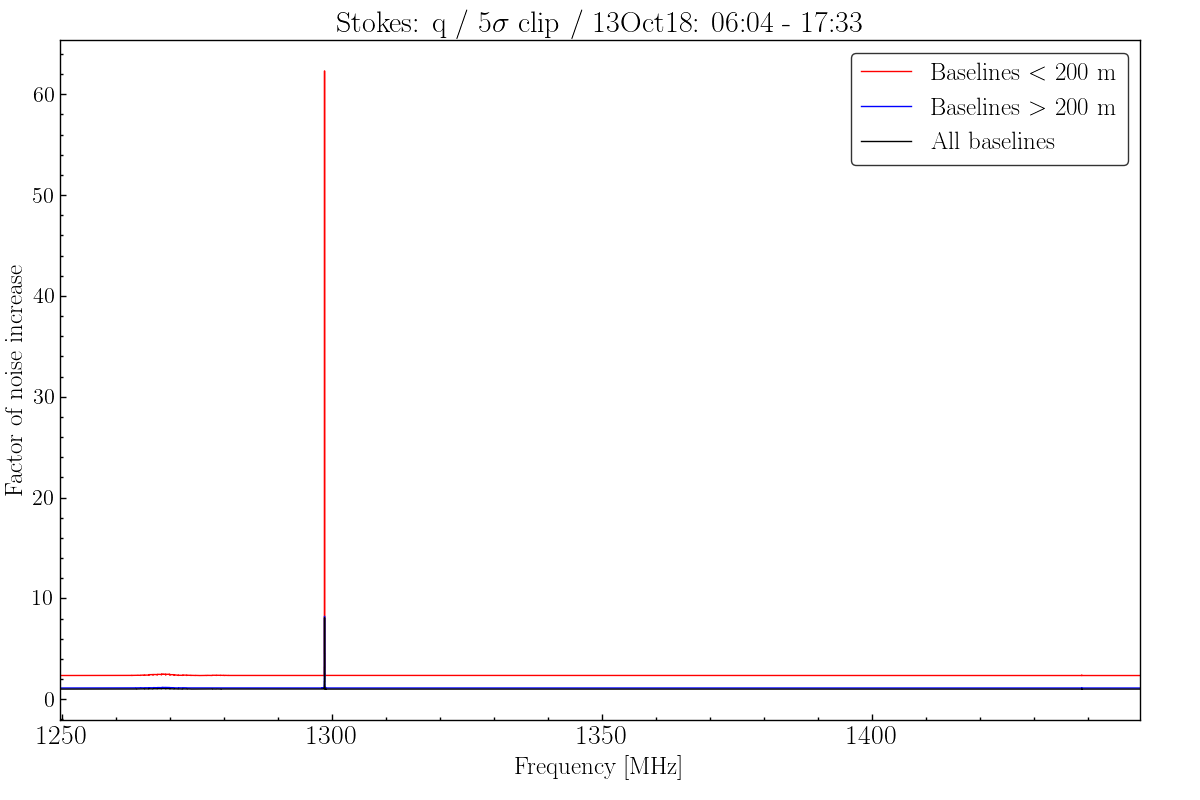

/home/adams/rfirfi_q/plots/AltAZ_full.png


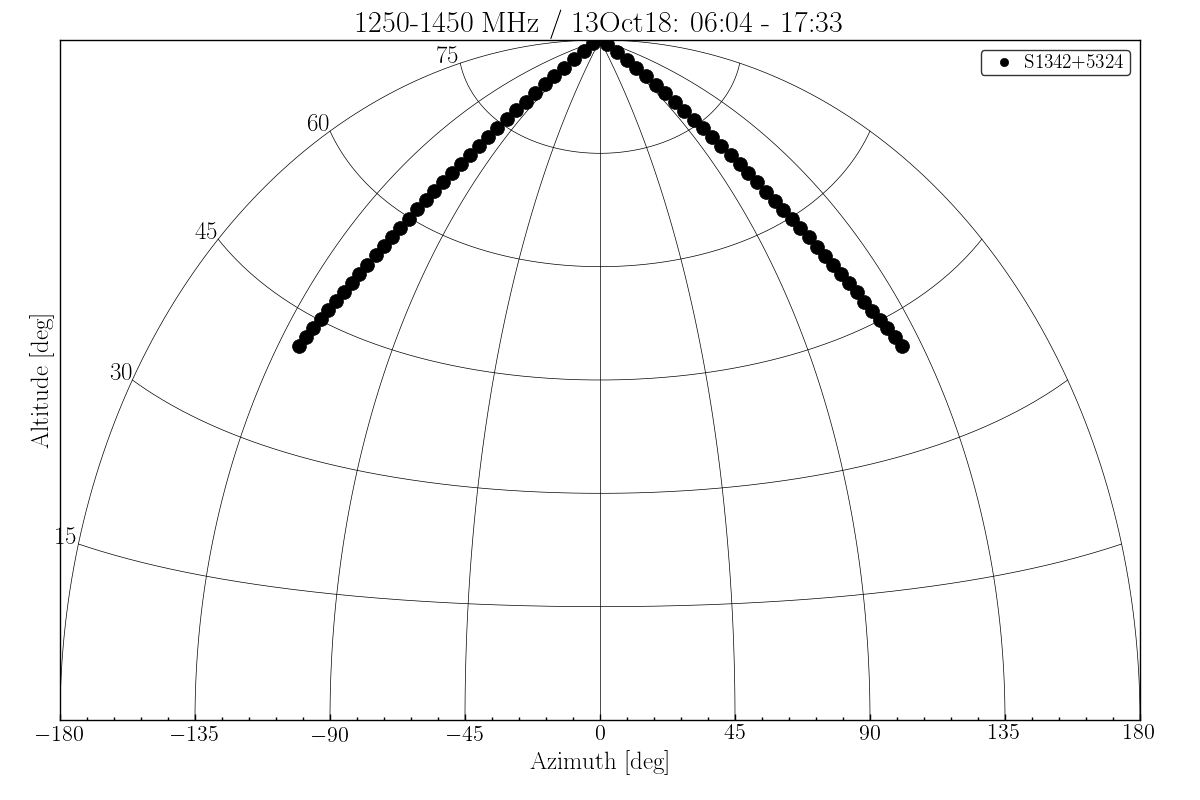

/home/adams/rfirfi_q/plots/noise_full_sl_rfi.png


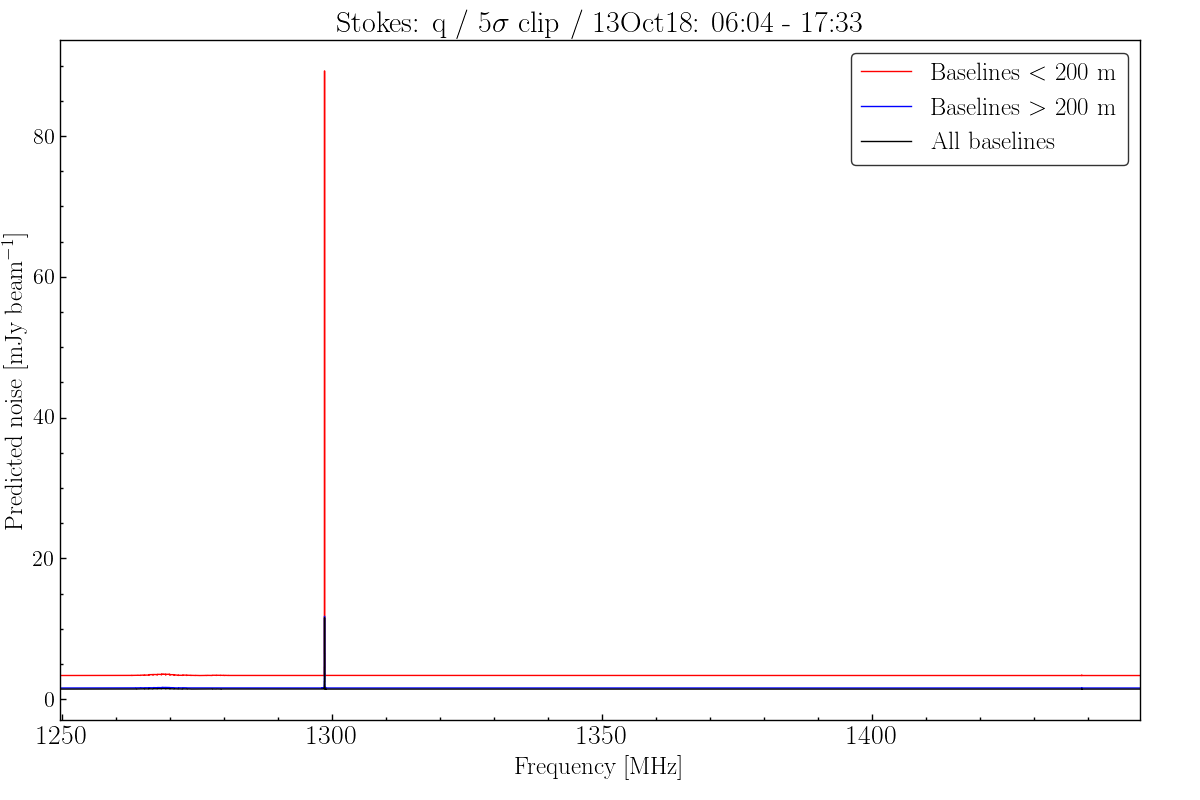

In [11]:
rfipltlist_png = glob.glob('/home/adams/rfirfi_q/plots' +'/'+'*png')

# load files as images
x=Image(rfipltlist_png[0])
y=Image(rfipltlist_png[1])
z=Image(rfipltlist_png[2])
w=Image(rfipltlist_png[3])
v=Image(rfipltlist_png[4])

#then display all images
print rfipltlist_png[0] 
display(x)
print rfipltlist_png[1]
display(y)
print rfipltlist_png[2]
display(z)
print rfipltlist_png[3]
display(w)
print rfipltlist_png[4]
display(v)

In [12]:
preflag = apercal.preflag(cfgfile)
preflag.show()

PREFLAG - INFO : ### Configuration file /home/adams/shakedown/cfg/S1342+5324.cfg successfully read! ###


PREFLAG
	preflag_shadow = True
	preflag_edges = True
	preflag_ghosts = True
	preflag_manualflag = True
	preflag_manualflag_fluxcal = True
	preflag_manualflag_polcal = True
	preflag_manualflag_target = True
	preflag_manualflag_targetbeams = all
	preflag_manualflag_auto = True
	preflag_manualflag_antenna = 
	preflag_manualflag_corr = 
	preflag_manualflag_baseline = 
	preflag_manualflag_channel = 
	preflag_manualflag_time = 
	preflag_aoflagger = True
	preflag_aoflagger_bandpass = True
	preflag_aoflagger_fluxcal = True
	preflag_aoflagger_polcal = True
	preflag_aoflagger_target = True
	preflag_aoflagger_targetbeams = all
	preflag_aoflagger_fluxcalstrat = fluxcal.rfis
	preflag_aoflagger_polcalstrat = polcal.rfis
	preflag_aoflagger_targetstrat = target.rfis


In [ ]:
#believe I can now directly just run preflag.go()
#will find out!

start = timer()
preflag.go()
end = timer()
print 'Elapsed time for to flag the data is {} minutes'.format((end - start)/60.) #time in minutes



PREFLAG - INFO : ########## Starting Pre-flagging step ##########
PREFLAG - INFO : # Flagging shadowed antennas #
PREFLAG - INFO : # Flagging subband edges #
PREFLAG - INFO : # Flagging ghost channels #


In [15]:
print 'Elapsed time to flag the data is {} minutes'.format((end - start)/60.) #time in minutes
print 'Elapsed time to flag the data is {} hours'.format((end - start)/3600.) #time in hours
print 'Elapsed time to flag the data is {} days'.format((end - start)/(3600.*24)) #time in days

Elapsed time to flag the data is 2108.40488108 minutes
Elapsed time to flag the data is 35.1400813514 hours
Elapsed time to flag the data is 1.46417005631 days


rfinder - INFO : 	 ... Reading parameter file ... 

rfinder - INFO :  ------ STARTING RFI analysis ------

rfi - INFO : 	 ... Field, Antenna & Bandwidth Info ...



Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS/FIELD: 9 columns, 1 rows


rfi - INFO : 	Field with name S1342+5324 (Field ID = 0)
rfi - INFO : 	Total number of antennas:	12


Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS/ANTENNA: 8 columns, 12 rows


rfi - INFO : 	Antenna names:		[ 0  1  2  3  4  5  6  7  8  9 10 11]


Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS/SPECTRAL_WINDOW: 14 columns, 1 rows

rfi - INFO : 	Channel Width [kHz]:	12.20703125
rfi - INFO : 	Start         [GHz]:	1.249609375
rfi - INFO : 	End           [GHz]:	1.44959716797

rfinder_stats - INFO : 	 ...  Observing time Info ... 




Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS: 24 columns, 105144 rows


rfinder_stats - INFO : 	 Start date: 18Oct13:06:04:15
rfinder_stats - INFO : 	 End date  : 18Oct13:17:33:55 


rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 



Successful readonly open of default-locked table /data/adams/apertif/shakedown_S1342+5324/00/raw/S1342+5324.MS: 24 columns, 105144 rows


rfinder_stats - INFO : 		 ... Altitude = [41.46909026] deg
rfinder_stats - INFO : 		 ... Azimuth = [52.73099086] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ...  Predicting natural r.m.s. ... 

rfinder_stats - INFO : 	 Assumptions on apertif telescope
rfinder_stats - INFO : 		Dish diameter = 25.0 m
rfinder_stats - INFO : 		 ... and SEFD = 523.131552 Jy
rfinder_stats - INFO : 		 ... and Tsys = 93.0 K
rfinder_stats - INFO : 	 Properties of observation
rfinder_stats - INFO : 		 Total number of baselines = 66.0
rfinder_stats - INFO : 		 Total number of channels = 16384
rfinder_stats - INFO : 		 Observing time on source = 11.50293 h (2 polarisations)

rfinder_stats - INFO : 	 Stokes I natural r.m.s.       = 1.432e+00 mJy/b 
rfinder_stats - INFO : 	 ... Natural r.m.s. predicted ... 

rfi - INFO : 	 ... info from MS file loaded  


rfinder - INFO : ---- MSfile Loaded -----

rfi - INFO : 	 ... Sorting baselines ... 

rfinder_stats - INFO : 	 ... Baseline info .

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [80.27405445] deg
rfinder_stats - INFO : 		 ... Azimuth = [81.18169293] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [81.76902044] deg
rfinder_stats - INFO : 		 ... Azimuth = [81.76285903] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [83.26586486] deg
rfinder_stats - INFO : 		 ... Azimuth = [82.15256958] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [84.76355629] deg
rfinder_stats - INFO : 		 ... Azimuth = [82.18830772] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [46.3549015] deg
rfinder_stats - INFO : 		 ... Azimuth = [302.66413562] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [45.09059135] deg
rfinder_stats - INFO : 		 ... Azimuth = [303.81428636] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [43.8432535] deg
rfinder_stats - INFO : 		 ... Azimuth = [304.97601626] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinder_stats - INFO : 		 ... Altitude = [42.61357473] deg
rfinder_stats - INFO : 		 ... Azimuth = [306.14951578] deg

rfinder_stats - INFO : 	 ... Alt/Az done ... 

rfinder_stats - INFO : 	 ... Altitude/Azimuth info ... 

rfinde

<IPython.core.display.Javascript object>


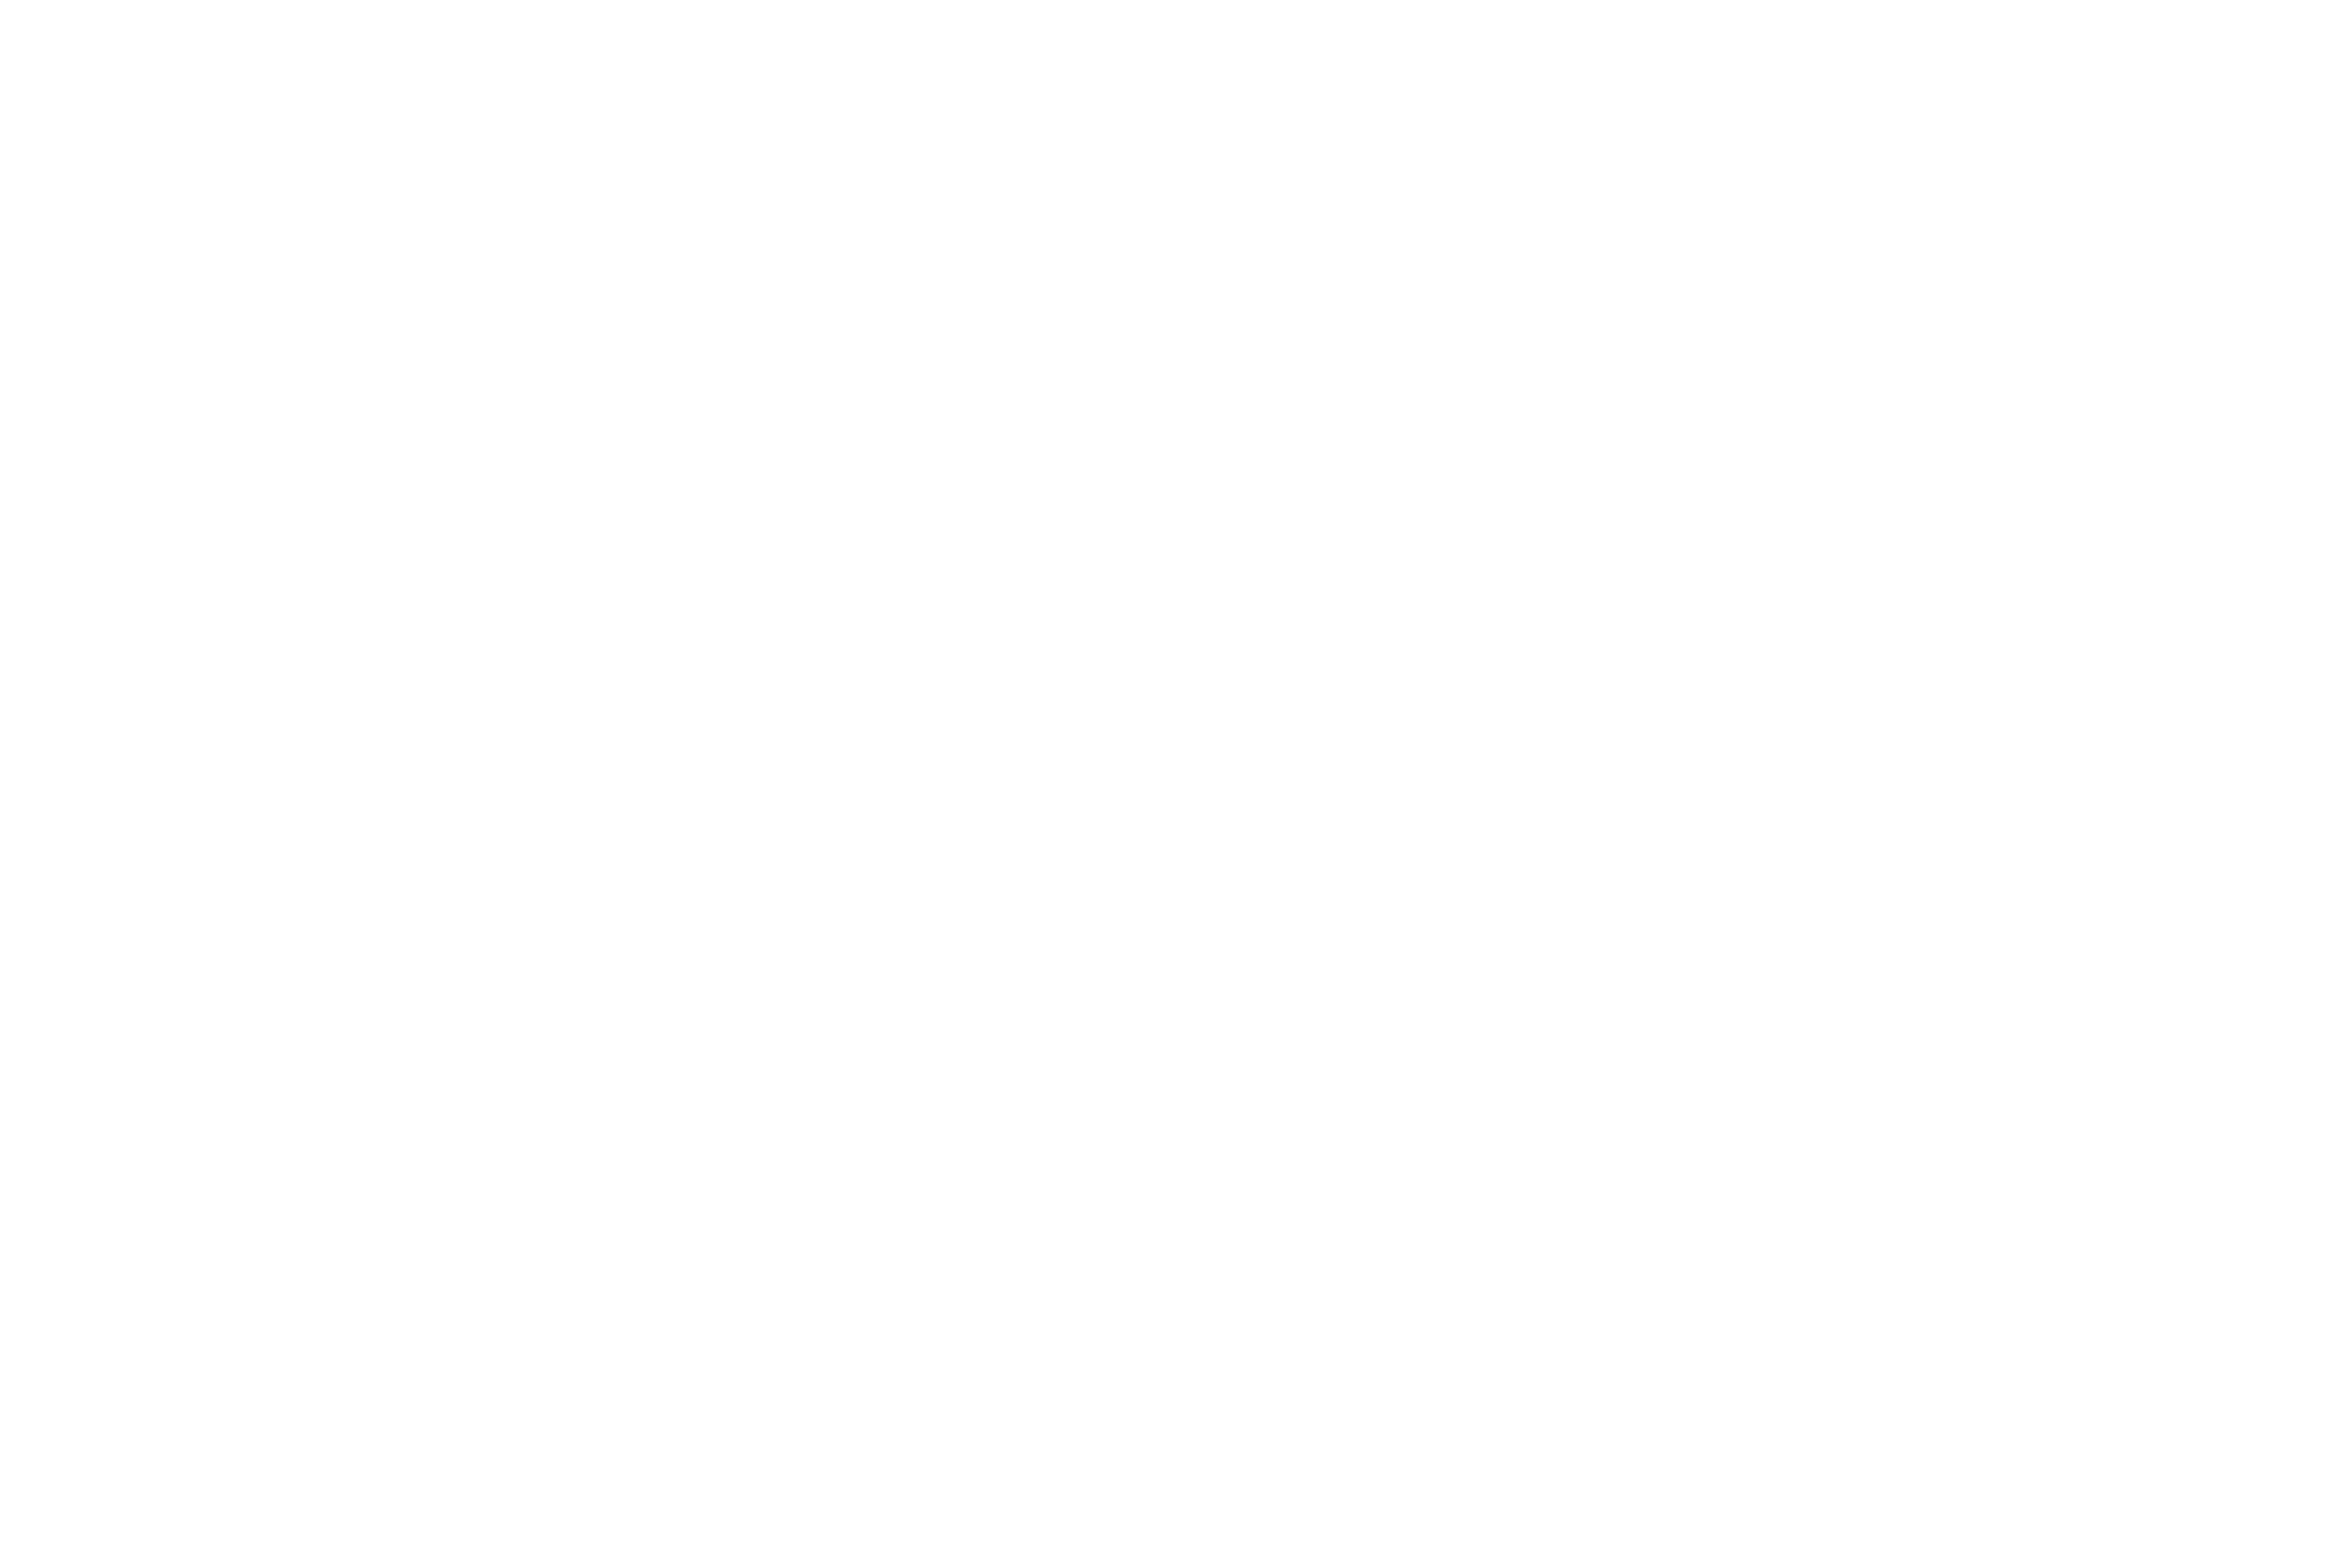

rfinder_plots - INFO : 	 ... ALT/AZ for S1342+5324 ...

rfinder - INFO : ---- Alt/Az plotted ----

rfinder_plots - INFO : 	 ... Plotting RFI in 2D ... 



<IPython.core.display.Javascript object>


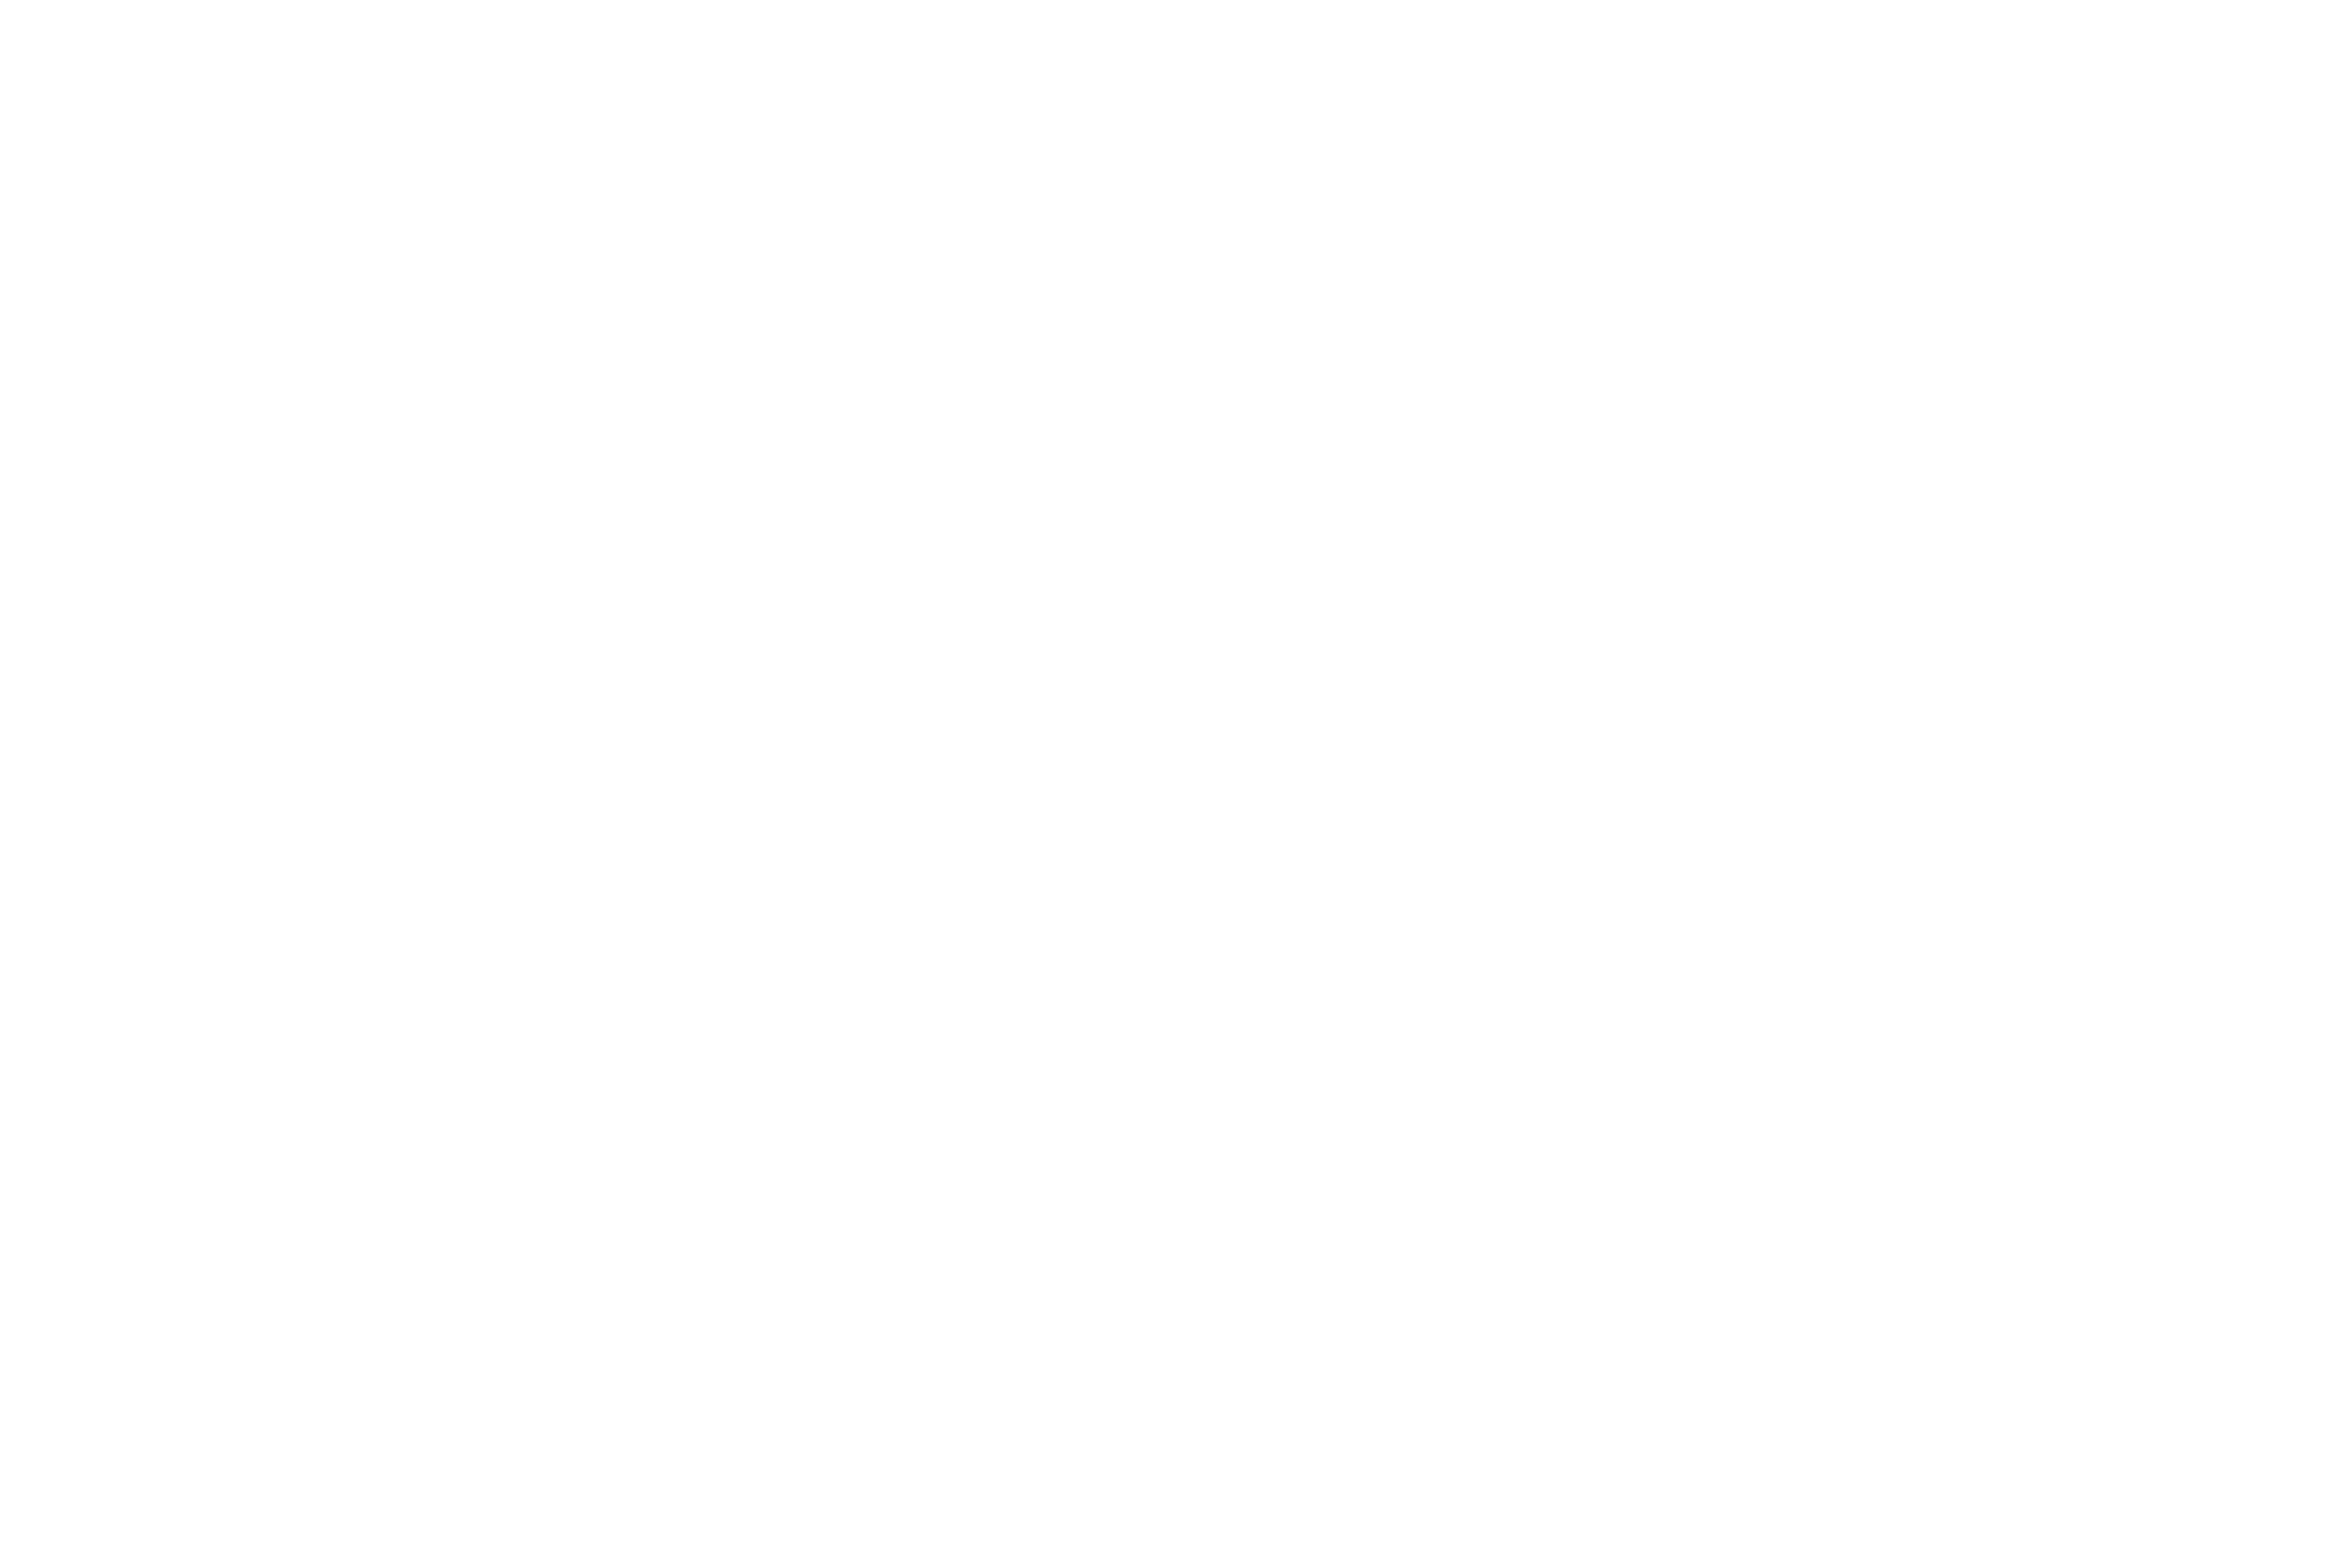

rfinder_plots - INFO : 	 ... RFI per baseline lenght and frequency plotted ... 


rfinder - INFO : ---- RFI in 2D plotted ----

rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting percentage of flagged RFI per frequency channel ...


<IPython.core.display.Javascript object>


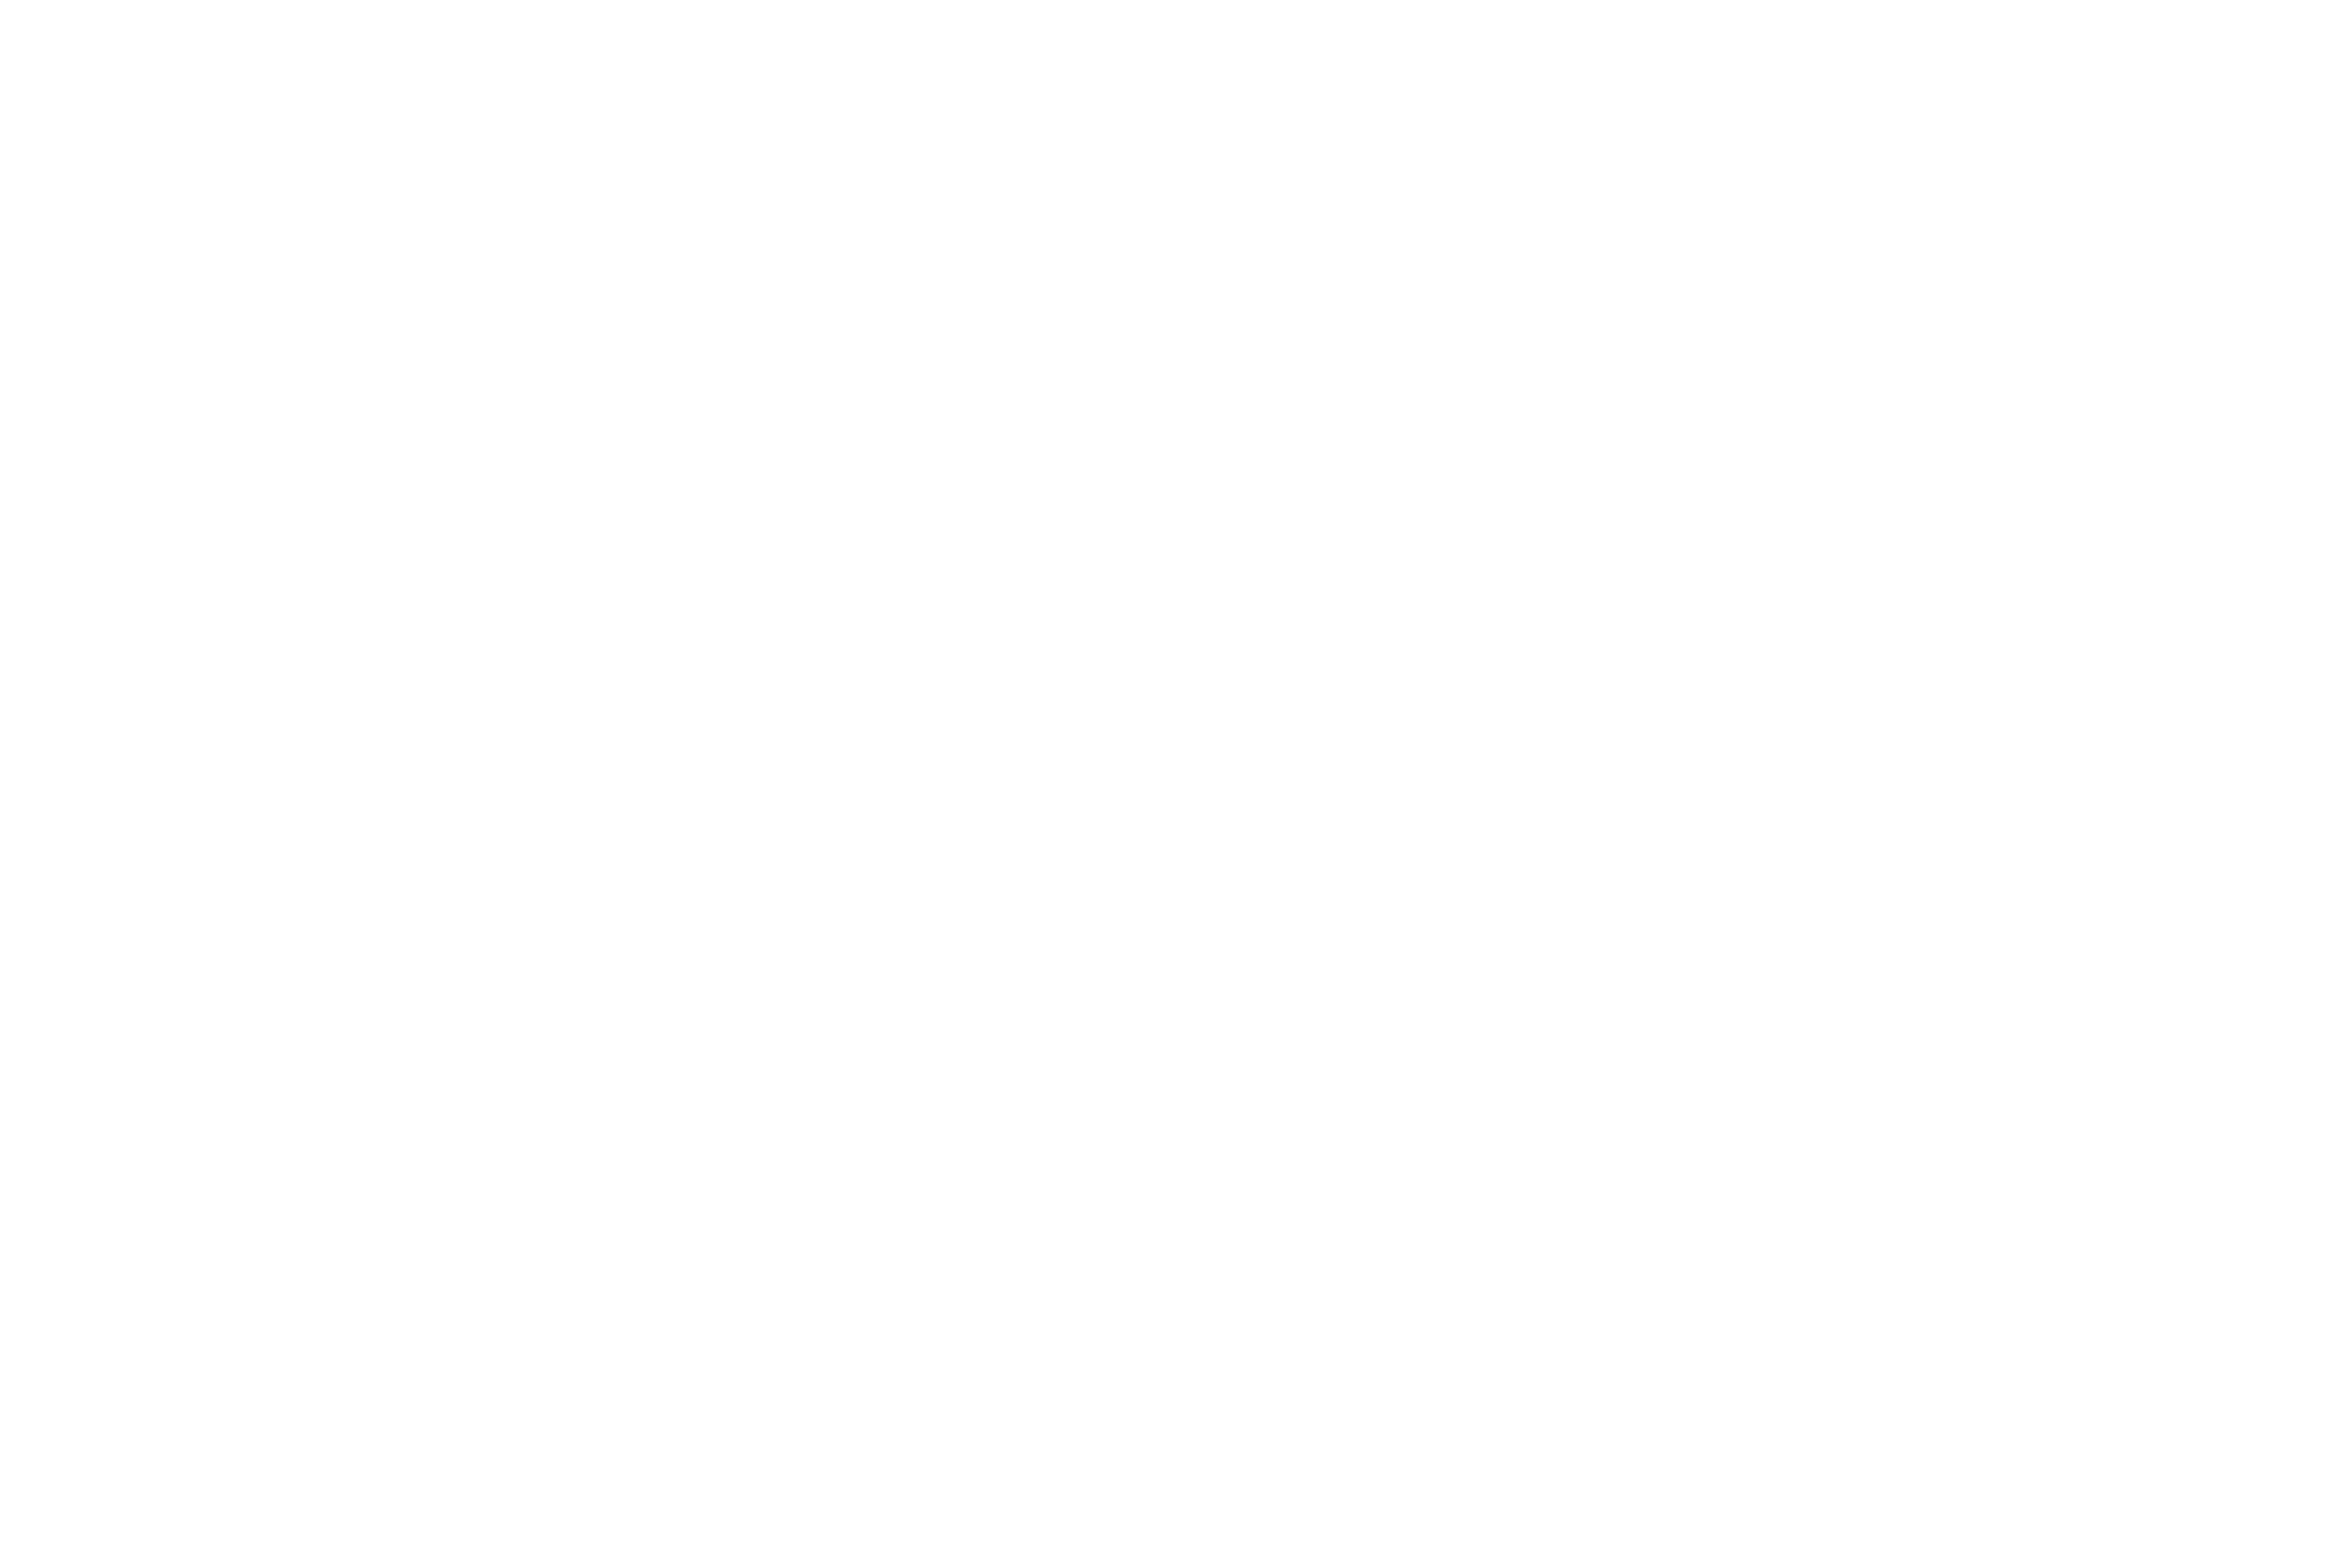

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting percentage of flagged RFI per frequency channel ...


<IPython.core.display.Javascript object>


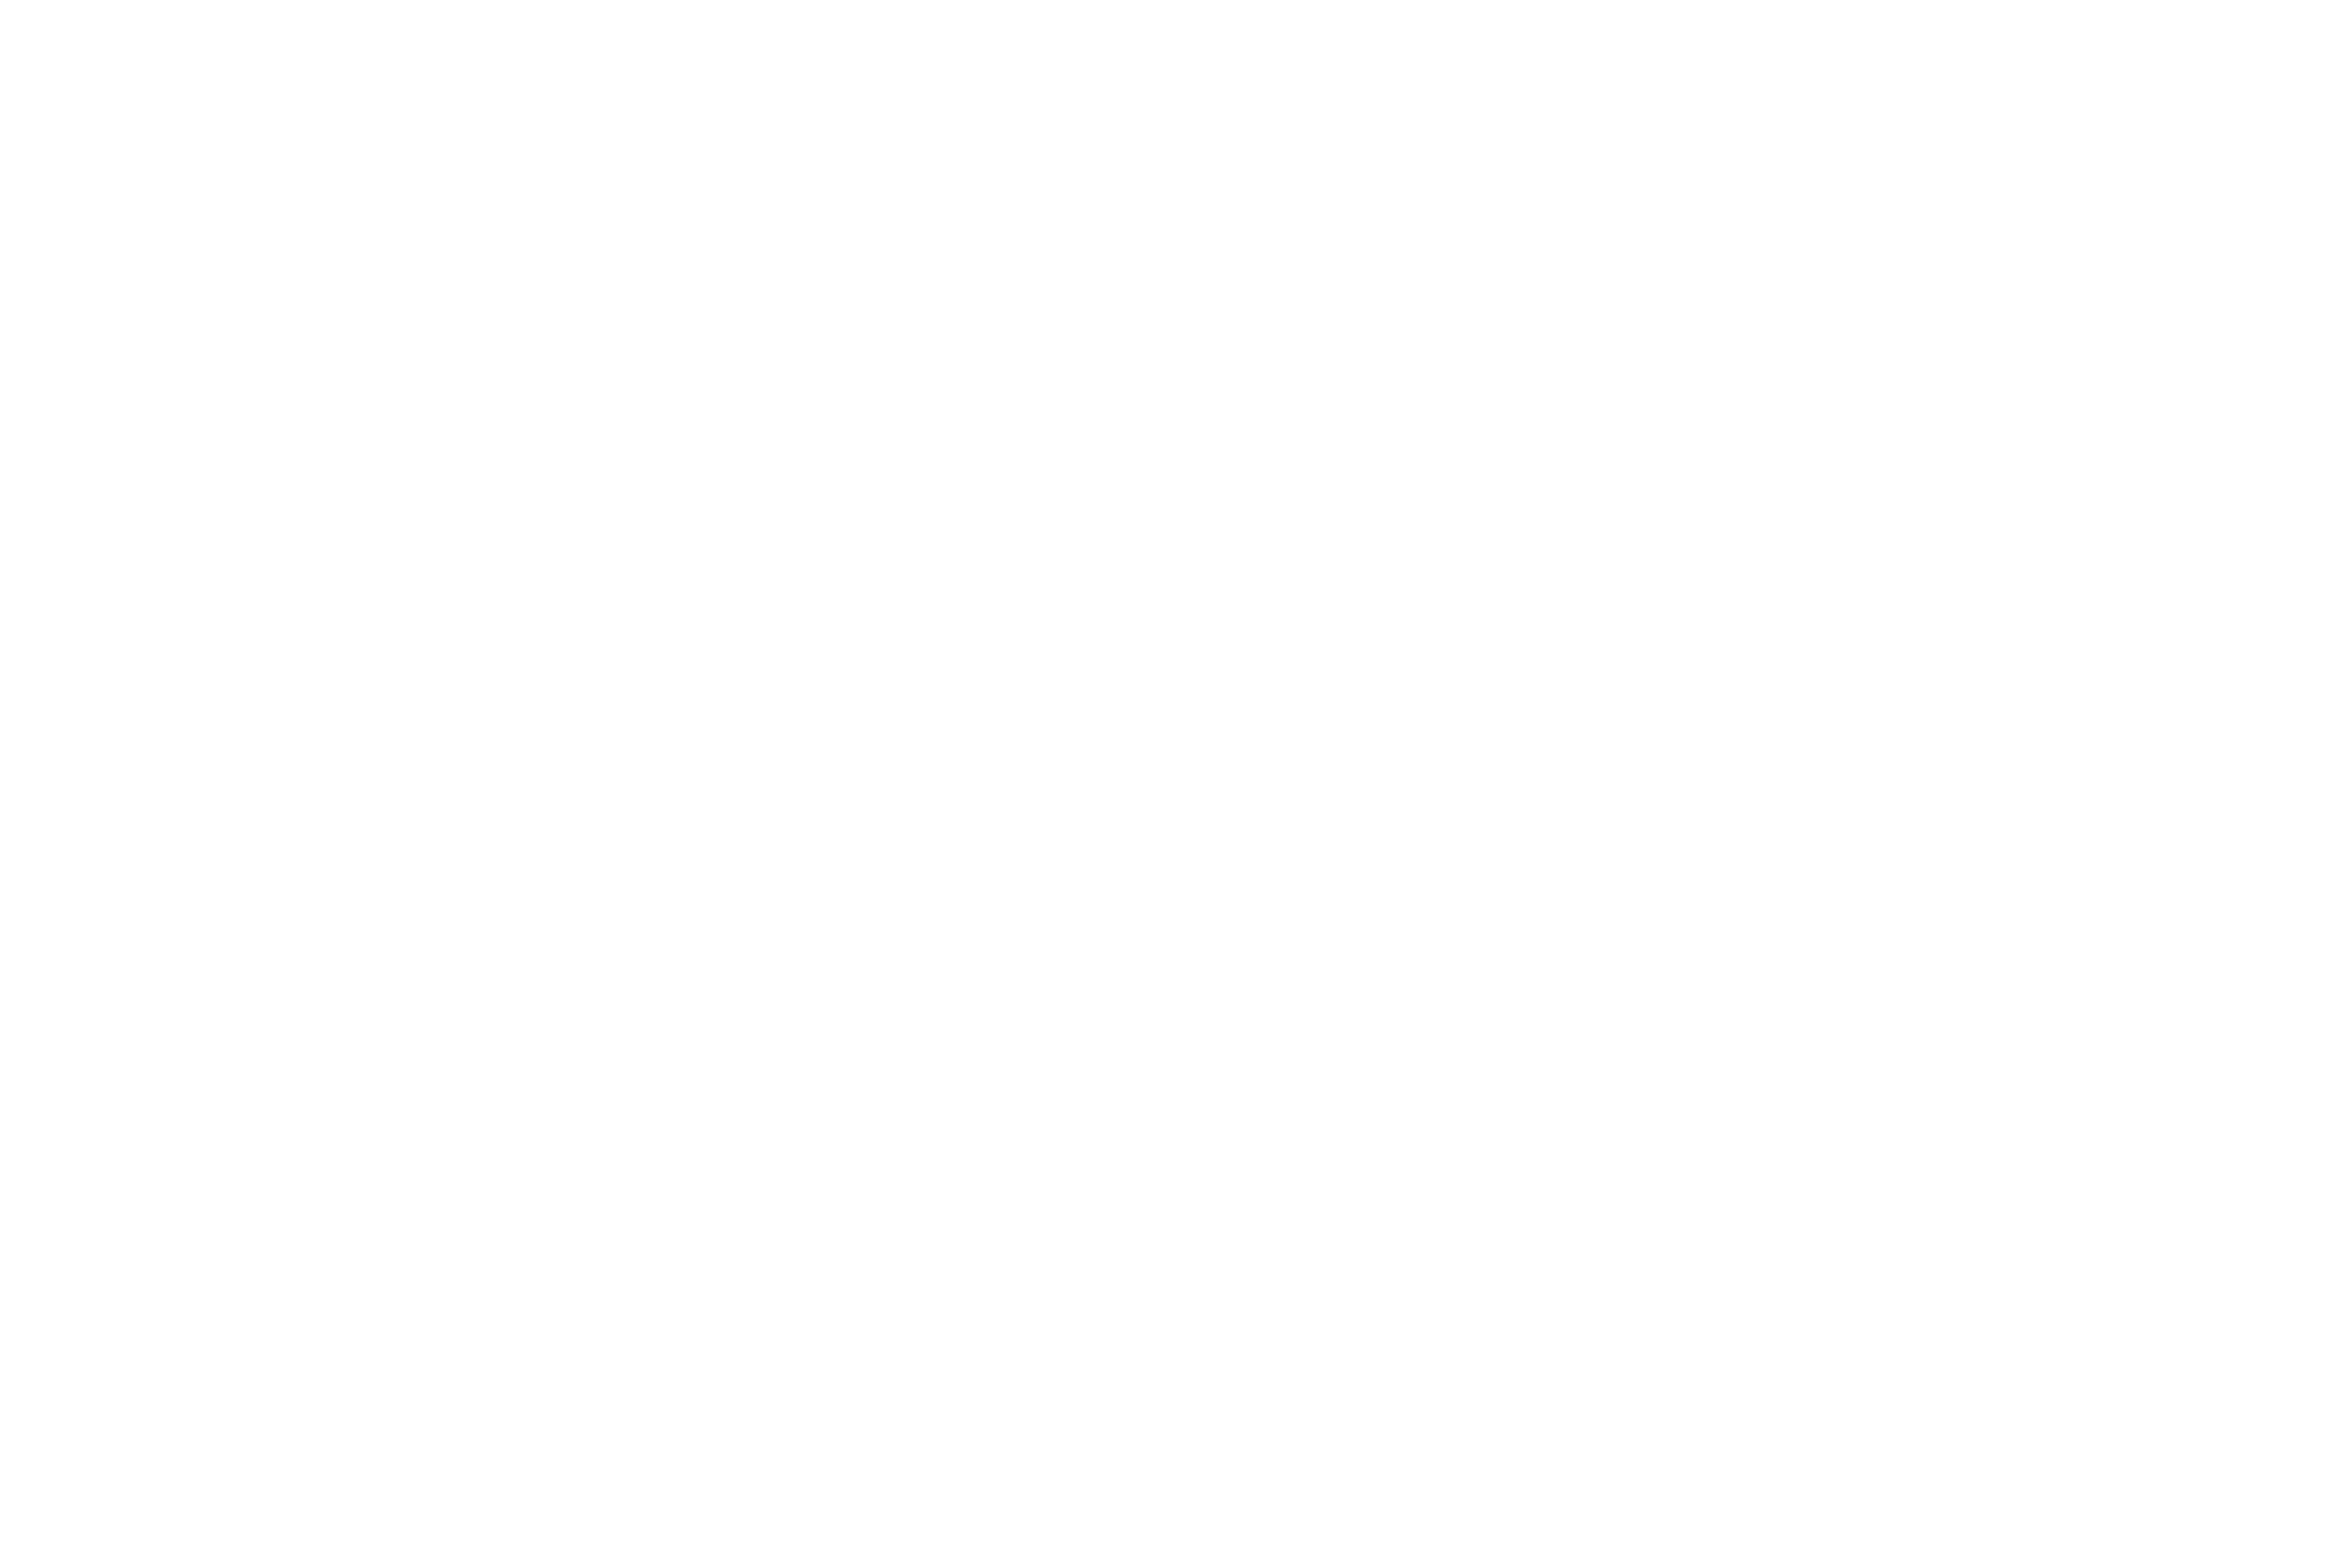

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 

rfinder_plots - INFO : 	 ... Plotting factor of noise increas per frequency channel ...


<IPython.core.display.Javascript object>


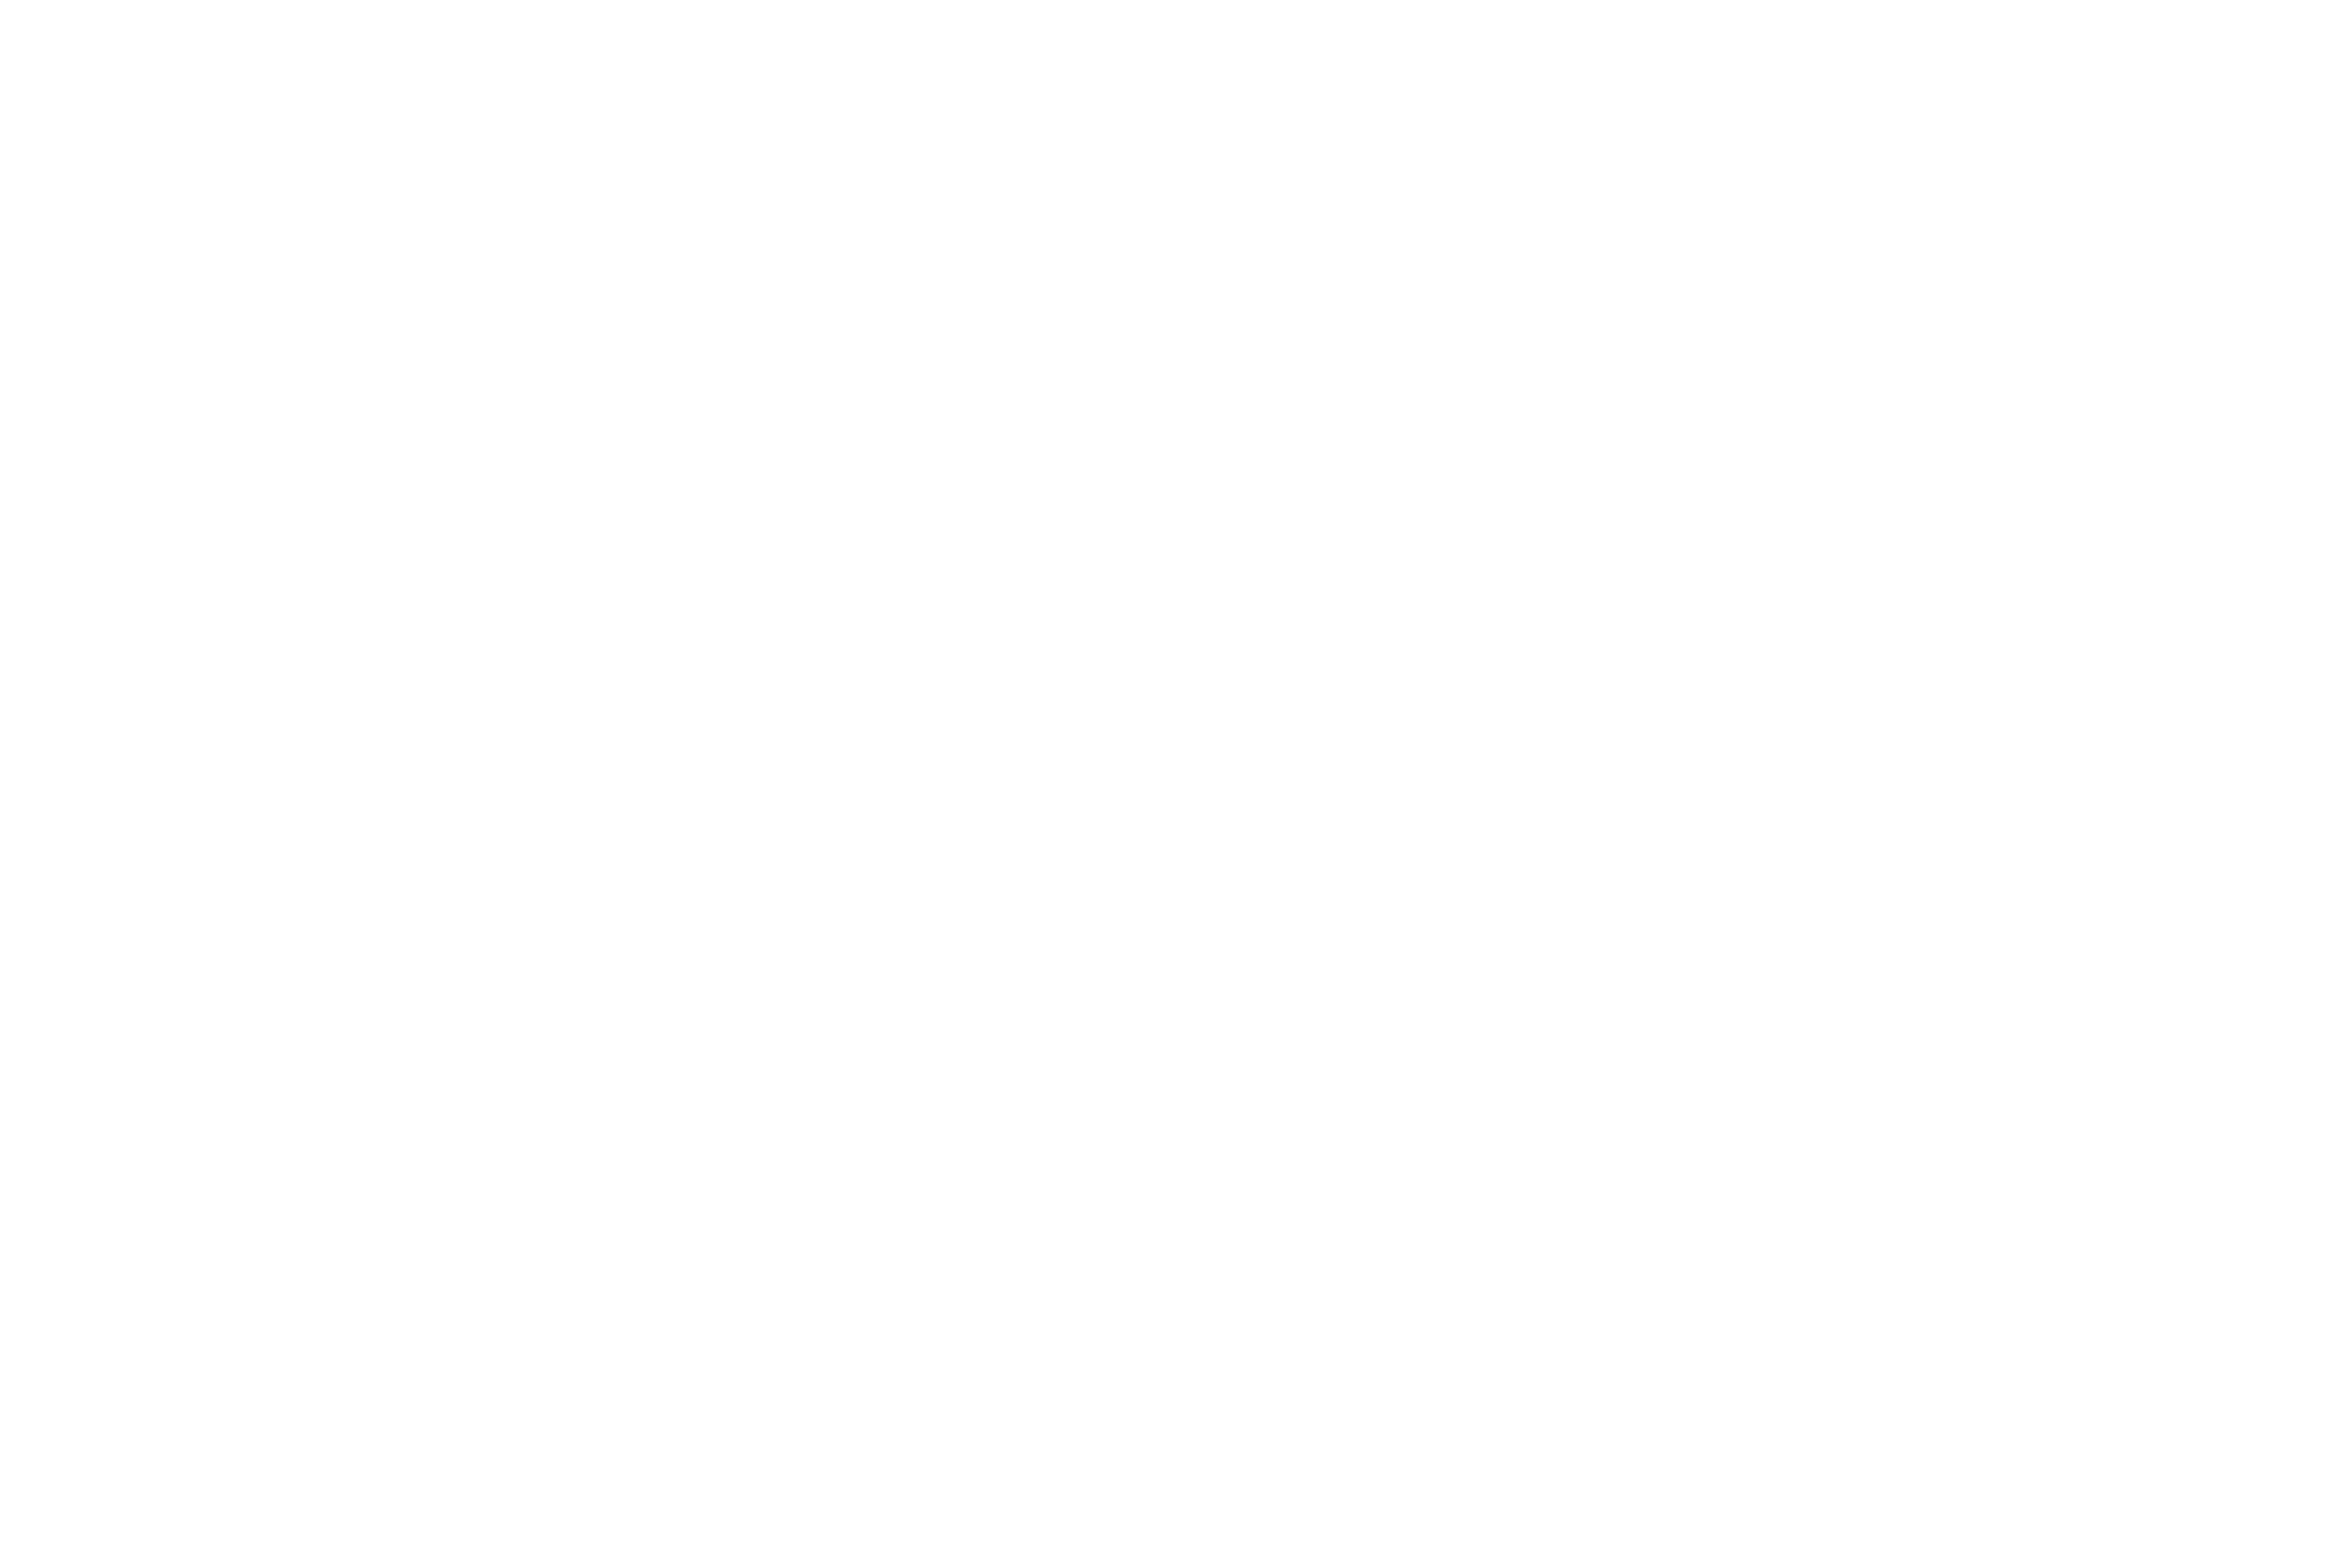

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder_plots - INFO : 	 ... Plotting RFI in 1D ... 



<IPython.core.display.Javascript object>


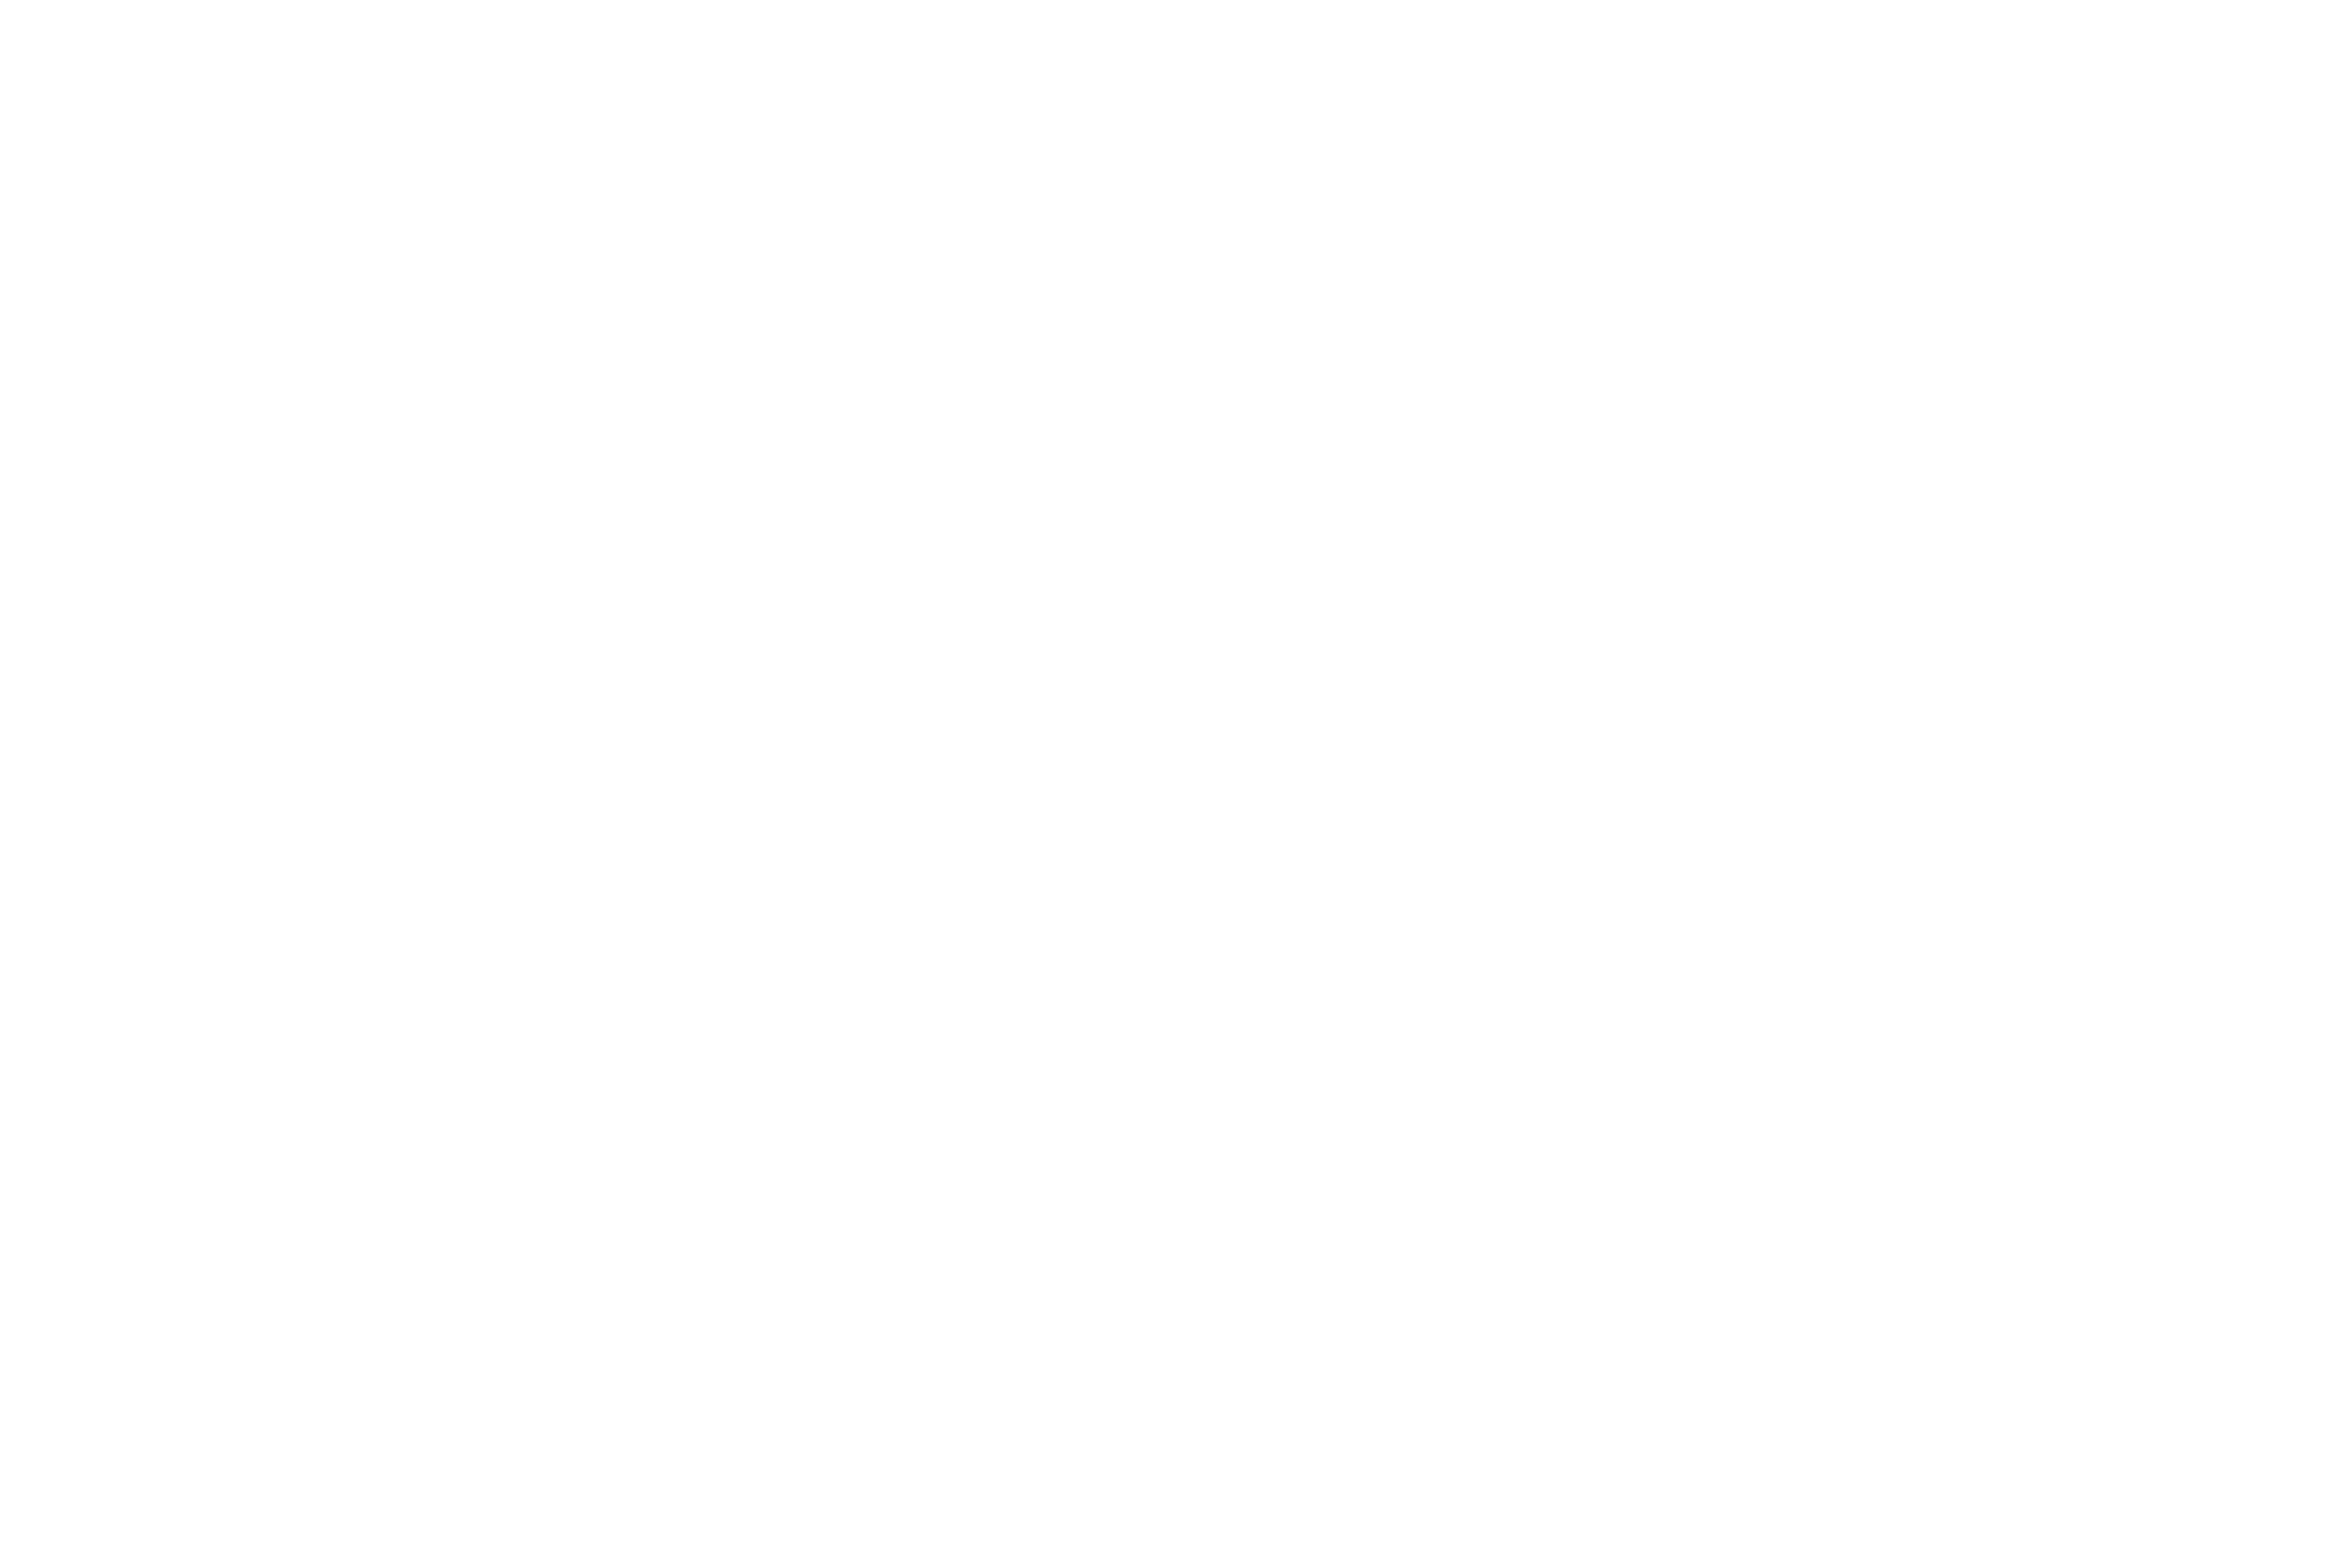

rfinder_plots - INFO : 	 ... Plotting RFI in long and short baselines ...
rfinder_plots - INFO : 	 ... RFI in 1D plotted ...


rfinder - INFO : ---- RFI in 1D plotted ----

rfinder - INFO :  ------ End of RFInder ------ 




	+------+
	 Html report done 
	+------+
	+------+
	 Done 
	+------+
Elapsed time to use RFInder to look at flags is


In [17]:
#before moving on to convert, use RFInder again
#This time want to look at applied flags, and see how that compares
#to predictions made above by RFInder

startrfi=timer()
# get parameters and run the RFInder module
rfi_par = rfinder.rfinder('/home/adams/rfinder_default.yml')

# Set working directory & filenames
rfi_par.cfg_par['general']['workdir'] = preflag.rawdir+'/' #look at central beam, add trailing slash
# Enable / disable modules
rfi_par.cfg_par['rfi']['enable'] = True  
rfi_par.cfg_par['beam_shape']['enable'] = False
rfi_par.cfg_par['plots']['enable'] = True
rfi_par.cfg_par['rfi']['RFInder_mode'] = 'use_flags'  #set it to use flags from MS
# MS file
rfi_par.cfg_par['general']['msname'] = [preflag.target]

rfi_par.set_dirs()
# print parameters
#print rfi_par.cfg_par

#run rfinder
run = rfi_par.go(rfi_par.cfg_par)

if run == 0: 
    print '\t+------+\n\t Done \n\t+------+'

endrfi=timer()

print 'Elapsed time to use RFInder to look at flags is {} minutes'.format((endrfi - startrfi)/60.) #time in minutes

In [19]:
print 'Elapsed time to use RFInder to look at flags is {} minutes'.format((endrfi - startrfi)/60.) #time in minutes

Elapsed time to use RFInder to look at flags is 4.30365134875 minutes


['/home/adams/rfirfi_q/plots/flags_full_sl_flags.png', '/home/adams/rfirfi_q/plots/noise_full_sl_flags.png', '/home/adams/rfirfi_q/plots/noisefactor_full_sl_flags.png', '/home/adams/rfirfi_q/plots/flags_base_full.png']


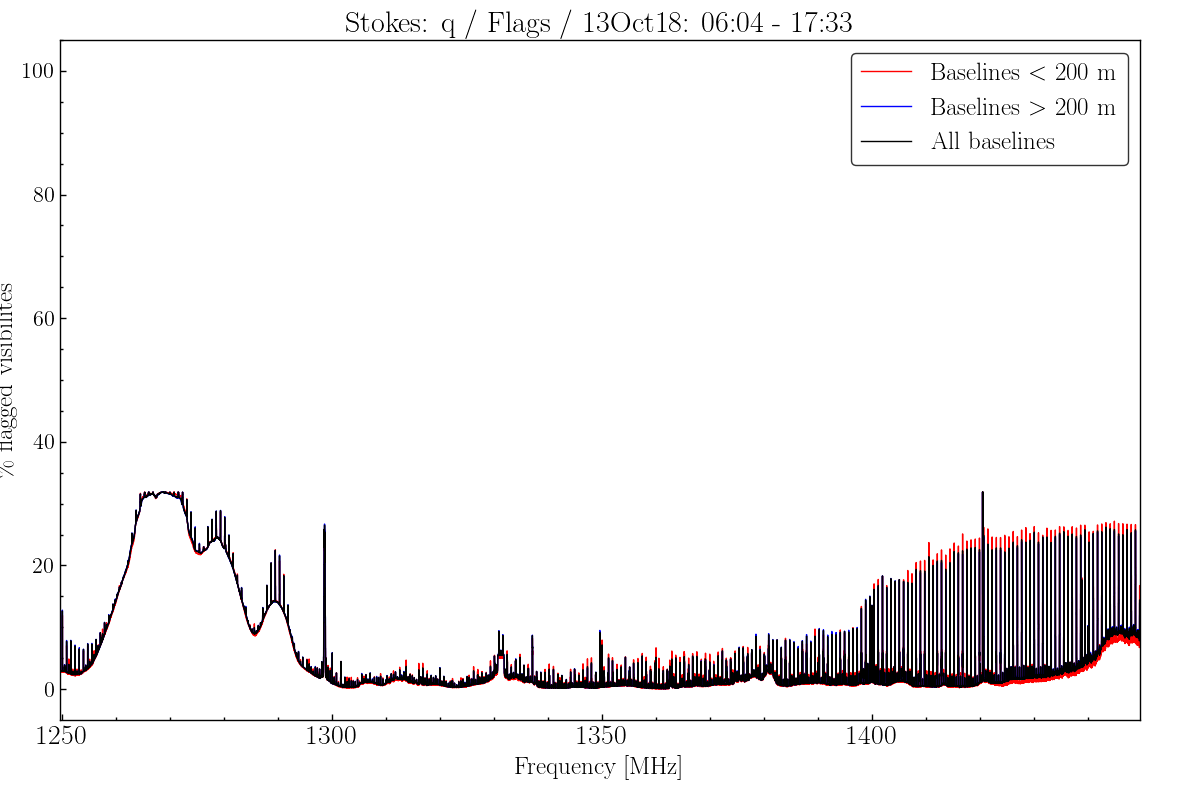

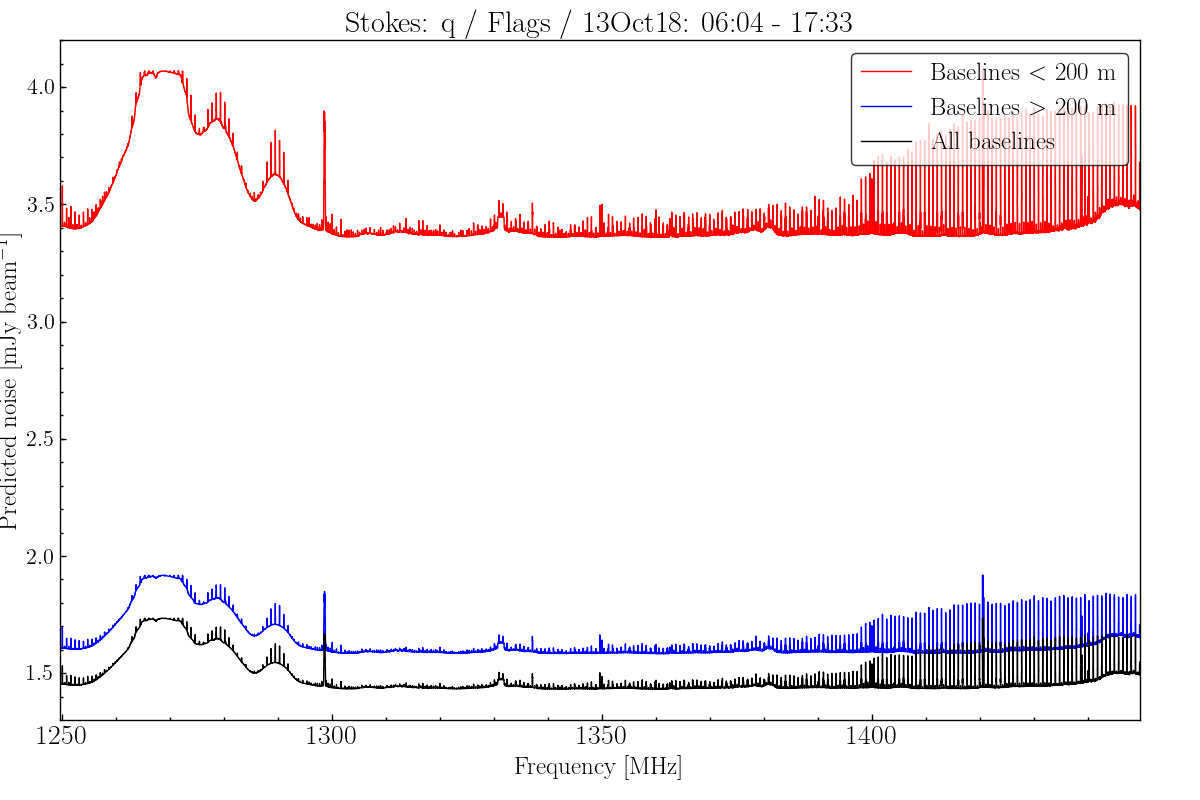

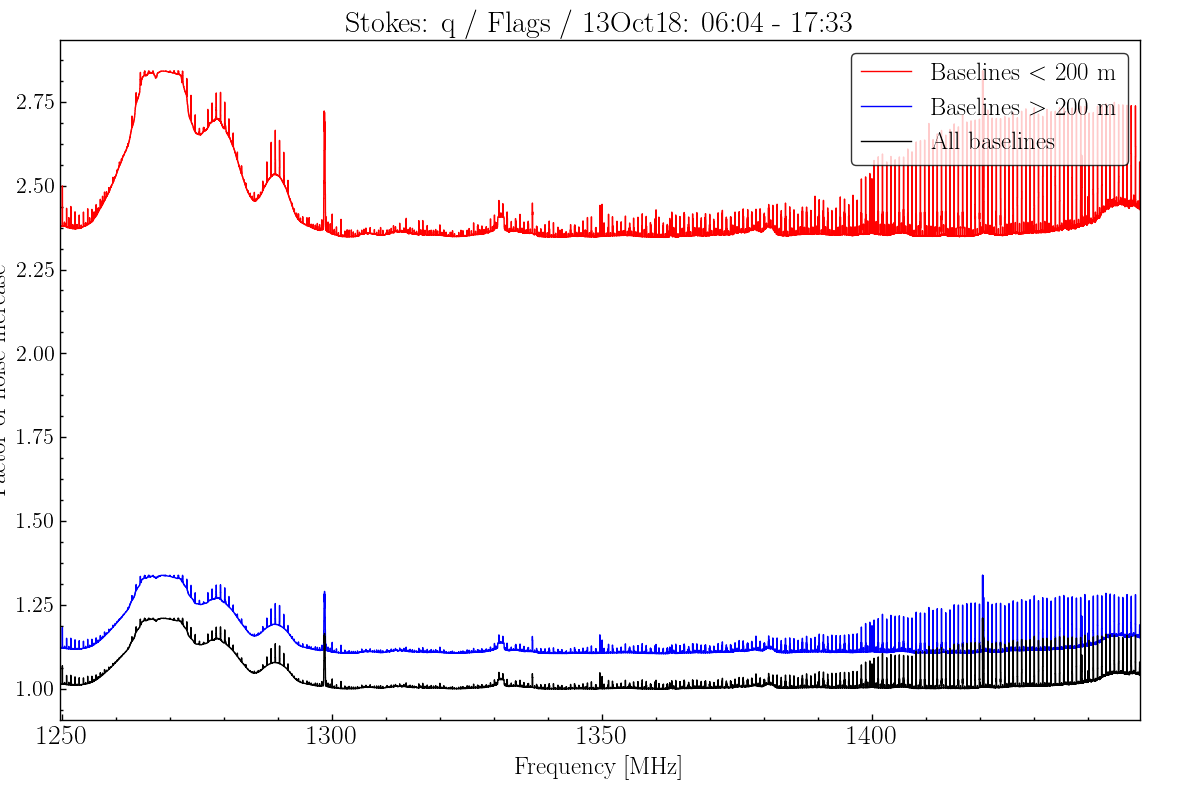

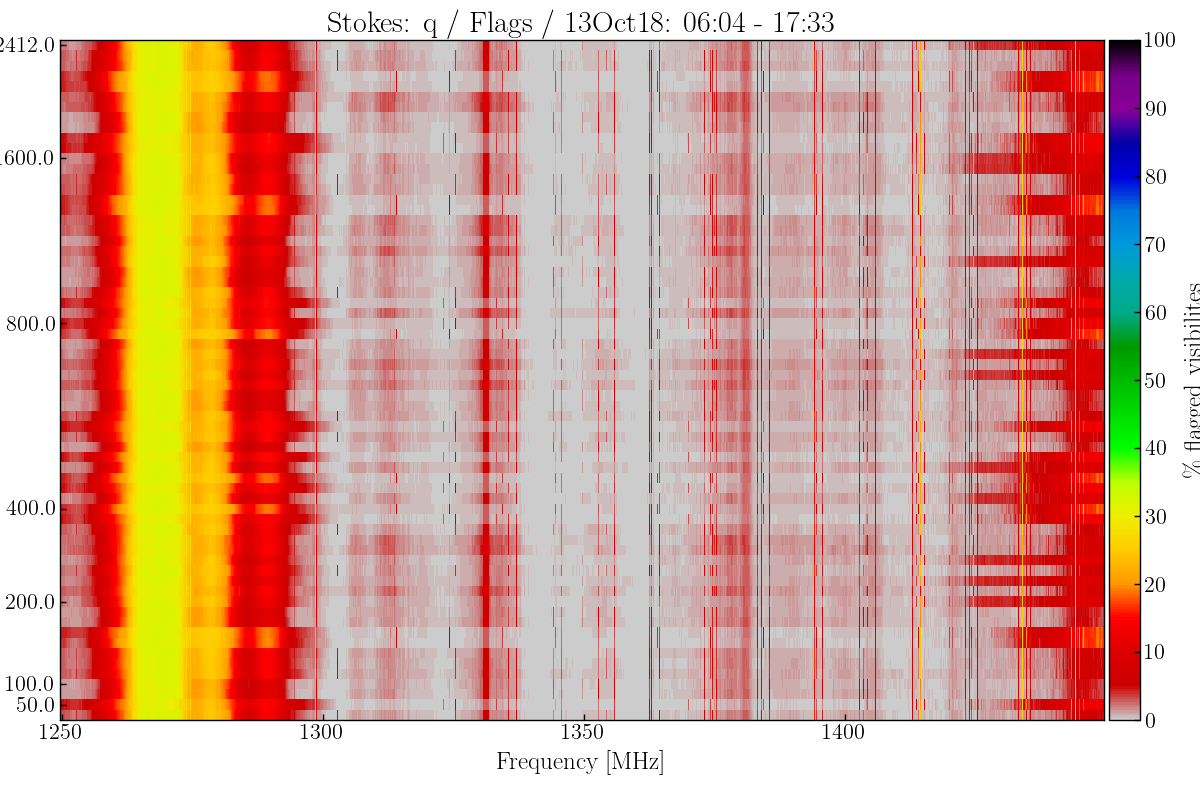

In [23]:
rfipltlist_png = glob.glob('/home/adams/rfirfi_q/plots' +'/'+'*flags.png') 
rfipltlist_png.append(glob.glob('/home/adams/rfirfi_q/plots' +'/'+'flags_base_full.png')[0])
#need to check this to see if it updates plots or not
#Looks like there are new plots, need to be careful about naming convention
#unfortunately not a single straightword way to do this
print rfipltlist_png


# load files as images
x=Image(rfipltlist_png[0])
y=Image(rfipltlist_png[1])
z=Image(rfipltlist_png[2])
w=Image(rfipltlist_png[3])
#v=Image(rfipltlist_png[4])

#then display all images
display(x,y,z,w)

#Can see flagging of ghosts and subband edges. Not sure what else to take from this
#Can see RFI below 1300

In [12]:
#inspected in rfigui briefly and looks good, so move on
convert = apercal.convert(cfgfile)
convert.show()

CONVERT - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


CONVERT
	convert_ms2uvfits = True
	convert_ms2uvfits_tool_casa_autocorr = False
	convert_uvfits2mir = True
	convert_fluxcal = True
	convert_polcal = False
	convert_target = True


In [13]:
convert.go()

CONVERT - INFO : ########## FILE CONVERSION started ##########
CONVERT - INFO : ### Starting conversion from MS to UVFITS format ###
CONVERT - INFO : ### Converted MS file 3C147.MS to UVFITS format! ###
CONVERT - INFO : ### Converted MS file /data/adams/apertif/AGC749237/00/raw/AGC749237.MS to UVFITS format! ###
CONVERT - INFO : ### Conversion from MS to UVFITS format done! ###
CONVERT - INFO : ### Starting conversion from UVFITS to MIRIAD format ###
CONVERT - INFO : ### Converted UVFITS file 3C147.MS to MIRIAD format! ###
CONVERT - INFO : ### Converted UVFITS file /data/adams/apertif/AGC749237/00/crosscal/AGC749237.UVFITS to MIRIAD format! ###
CONVERT - INFO : ### Conversion from UVFITS to MIRIAD format done! ###
CONVERT - INFO : ########## FILE CONVERSION done ##########


In [14]:
ccal = apercal.ccal(cfgfile)
ccal.show()

CROSSCAL - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


CROSSCAL
	crosscal_bandpass = True
	crosscal_delay = True
	crosscal_polarisation = False
	crosscal_transfer_to_target = True


In [15]:
ccal.go()

CROSSCAL - INFO : ########## Starting CROSS CALIBRATION ##########
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data started ###
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data done ###
CROSSCAL - INFO : ### No polarisation calibration done! ###
CROSSCAL - INFO : ### Copying calibrator solutions to target dataset ###
CROSSCAL - INFO : # Copying calibrator solutions (bandpass, gains) from flux calibrator #
CROSSCAL - INFO : # Polarisation calibration solutions (leakage, angle) not found #
CROSSCAL - INFO : # Copying calibrator solutions to 1 beams! #
CROSSCAL - INFO : # Calibrator solutions copied to beam 00! #
CROSSCAL - INFO : ### All solutions copied to target data set(s) ###
CROSSCAL - INFO : ########## CROSS CALIBRATION done ##########


In [16]:
scal = apercal.scal(cfgfile)

#Based on previous experience with UGC8261, I will start with amplitude selfcal
#I will then check my fluxes against NVSS in the end
scal.selfcal_parametric = True
scal.selfcal_parametric_amp = True
scal.selfcal_standard_amp = True

scal.show()

SELFCAL - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


SELFCAL
	selfcal_image_imsize = 2049
	selfcal_image_cellsize = 4
	selfcal_splitdata = True
	selfcal_splitdata_chunkbandwidth = 0.02
	selfcal_splitdata_channelbandwidth = 0.001
	selfcal_flagantenna = 
	selfcal_flagline = True
	selfcal_flagline_sigma = 0.5
	selfcal_parametric = True
	selfcal_parametric_skymodel_radius = 0.5
	selfcal_parametric_skymodel_cutoff = 0.8
	selfcal_parametric_skymodel_distance = 30
	selfcal_parametric_solint = 10
	selfcal_parametric_uvmin = 0.5
	selfcal_parametric_uvmax = 1000
	selfcal_parametric_amp = True
	selfcal_standard_majorcycle = 3
	selfcal_standard_majorcycle_function = square
	selfcal_standard_minorcycle = 5
	selfcal_standard_minorcycle_function = square
	selfcal_standard_c0 = 10.0
	selfcal_standard_c1 = 5.0
	selfcal_standard_minorcycle0_dr = 3.0
	selfcal_standard_drinit = 25
	selfcal_standard_dr0 = 2.0
	selfcal_standard_nsigma = 50
	selfcal_standard_uvmin = [0.0, 0.0, 0.0]
	selfcal_standard_uvmax = [3000, 3000, 3000]
	selfcal_standard_solint = [5, 3, 

In [17]:
scal.go()

SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : # Creating directory /data/adams/apertif/AGC749237/00/selfcal #
SELFCAL - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/selfcal #
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Adjusting chunk size to 0.016796875 GHz for regular gridding of the data chunks over frequency #
SELFCAL - INFO : # Starting splitting of data chunk 0 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 0 to keep bandwidth of chunks equal over the whole bandwidth #
SELFCAL - INFO : # New frequency bin is 0.0010498046875 GHz #
SELFCAL - INFO : # Creating directory /data/adams/apertif/

SELFCAL - INFO : # Creating directory /data/adams/apertif/AGC749237/00/selfcal/02/pm #
root - INFO : ### Using standard WSRT beam for calculating apparent fluxes! ###
root - INFO : ### Field seems to have a flux of 0.27970044911377434 Jy ###
root - INFO : ### Found 9 source(s) in the model at a cutoff of 80.0 percent with a total flux of 0.22698664200520852 Jy ###
root - INFO : ### Wrote source textfile to /data/adams/apertif/AGC749237/00/selfcal/02/pm/model.txt! ###
SELFCAL - INFO : # Creating model from textfile model.txt for chunk 02 #
SELFCAL - INFO : # Doing parametric self-calibration on chunk 02 with solution interval 10 min and uvrange limits of 0.5~1000 klambda #
SELFCAL - INFO : # Parametric self calibration routine on chunk 02 done! #
SELFCAL - INFO : # Starting parametric self calibration routine on chunk 03 #
SELFCAL - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/selfcal/03 #
SELFCAL - INFO : # Creating directory /data/adams/apertif/AGC749237/00/selfcal/03/

SELFCAL - INFO : # Mask with threshold 0.02409982442855835 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/2 was set to 0.00481996488571167 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.022516519 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0004056721 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/3 set to 0.010711033079359266 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.010711033079359266 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0

SELFCAL - INFO : # RMS of the residual image is 0.00034557658 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/1 set to 0.002772824624005486 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.002772824624005486 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/1 was set to 0.0005545649248010972 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0025408424 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00034545147 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 00 fi

SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.00596744179725647 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set to 0.001193488359451294 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.005207067 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003789756 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 01 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=5 minutes for major cycle 00 #
SELFCAL - INFO : # Major self-calibration cycle 0 for frequency chunk 01 finished #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 01 started #
SELFCAL - INFO : # Creating directory /data/ad

SELFCAL - INFO : # Peak of the residual image is 0.002296297 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00043310944 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set to 0.0018836397171020508 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0018836397171020508 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/3 was set to 0.00037672794342041014 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0020696167 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00042771737 Jy/beam #
S

SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.004887048 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00032708514 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/1 set to 0.0055546771778779876 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0055546771778779876 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/1 was set to 0.0011109354355755975 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/1 created #
SELFCAL

SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0017831607 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00037702624 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 02 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 02 finished #
SELFCAL - INFO : # Standard self-calibration routine for chunk 02 finished #
SELFCAL - INFO : # Starting standard self-calibration routine on frequency chunk 03 #
SELFCAL - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/selfcal/03 #
SELFCAL - INFO : # Theoretical noise for chunk 03 is 3.58e-05 Jy/beam #
SELFCAL - INFO : # Your theoretical noise threshold will be 50 times the theoretical noise corresponding to 0.00179 Jy/beam #
SELFCAL - INFO : # Your dynamic range limits are set

SELFCAL - INFO : # Major/minor cycle 1/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0045899153 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00029985805 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.0037977989196777344 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0037977989196777344 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/3 was set to 0.0007595597839355468 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/3 created #
SELFCAL - INFO : # 

SELFCAL - INFO : # Clean threshold at major/minor cycle 0/0 was set to 0.01006540060043335 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.022218533 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00033430784 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09662784576416016 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.09662784576416016 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.019325569152832033 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning 

SELFCAL - INFO : # Major/minor cycle 1/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.002679547 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002695274 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 04 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=3 minutes for major cycle 01 #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 04 finished #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 04 started #
SELFCAL - INFO : # Creating directory /data/adams/apertif/AGC749237/00/selfcal/04/02 #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 04 started #
SELFCA

SELFCAL - INFO : # Clean threshold at major/minor cycle 0/2 was set to 0.004817264556884766 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.022249777 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003068778 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/3 set to 0.010705032348632813 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.010705032348632813 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0021410064697265628 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/3 cleani

SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/1 set to 0.0028212496813605813 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0028212496813605813 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/1 was set to 0.0005642499362721162 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0034211725 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0008075866 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequenc

SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 06 started #
SELFCAL - INFO : # Creating directory /data/adams/apertif/AGC749237/00/selfcal/06/01 #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 1 are [25.0, 26.5625, 31.25, 39.0625, 50.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/0 set to 0.00730539932847023 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.001461079865694046 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.0043311305 Jy/beam #
SELFCAL - INFO : # RMS o

SELFCAL - INFO : # Peak of the residual image is 0.002005984 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00033032786 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 06 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/4 set to 0.0017899999999999997 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask with threshold 0.0017899999999999997 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/4 was set to 0.0003579999999999999 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0018943272 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003289699 Jy/beam #

SELFCAL - INFO : # Cleaned image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0048538437 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00023035618 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 07 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/2 set to 0.004617100238800049 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.004617100238800049 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/2 was set to 0.0009234200477600098 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL 

In [5]:
continuum = apercal.continuum(cfgfile)
continuum.show()

CONTINUUM - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


CONTINUUM
	continuum_image_imsize = 2049
	continuum_image_cellsize = 4
	continuum_image_centre = 
	continuum_image_restorbeam = 
	continuum_image_convolbeam = 40,40,0.0
	continuum_mode = stack
	continuum_majorcycle_function = square
	continuum_minorcycle_function = square
	continuum_minorcycle0_dr = 3.0
	continuum_minorcycle = 5
	continuum_c0 = 10.0
	continuum_c1 = 5.0
	continuum_drinit = 25
	continuum_dr0 = 2.0
	continuum_nsigma = 30
	continuum_robust = 


In [6]:
continuum.go()

CONTINUUM - INFO : ########## Starting CONTINUUM IMAGING ##########
CONTINUUM - INFO : ### Starting deep continuum imaging of full dataset ###
CONTINUUM - INFO : # Creating directory /data/adams/apertif/AGC749237/00/continuum #
CONTINUUM - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/continuum #
CONTINUUM - INFO : ### Creating individual deep images from frequency chunks ###
CONTINUUM - INFO : # Creating directory /data/adams/apertif/AGC749237/00/continuum/stack #
CONTINUUM - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/continuum/stack #
CONTINUUM - INFO : ### Continuum imaging for chunk 00 started ###
CONTINUUM - INFO : # Last major self-calibration cycle seems to have been 3 #
CONTINUUM - INFO : # Creating directory /data/adams/apertif/AGC749237/00/continuum/stack/00 #
CONTINUUM - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/continuum/stack/00 #
CONTINUUM - INFO : # Theoretical noise for chunk 00 is 3.58e-05 Jy/beam #
CONTINUUM - INFO :

CONTINUUM - INFO : # Mask with threshold 0.0010739999999999999 Jy/beam created #
CONTINUUM - INFO : # Clean threshold for minor cycle 4 was set to 0.00021479999999999996 Jy/beam #
CONTINUUM - INFO : # Minor cycle 4 cleaning done #
CONTINUUM - INFO : # Cleaned image for minor cycle 4 created #
CONTINUUM - INFO : # Residual image for minor cycle 4 created #
CONTINUUM - INFO : # Peak of the residual image is 0.0012140835 Jy/beam #
CONTINUUM - INFO : # RMS of the residual image is 0.00030115902 Jy/beam #
CONTINUUM - INFO : ### Continuum imaging for chunk 01 successful ###
CONTINUUM - INFO : ### Continuum imaging for chunk 02 started ###
CONTINUUM - INFO : # Last major self-calibration cycle seems to have been 3 #
CONTINUUM - INFO : # Creating directory /data/adams/apertif/AGC749237/00/continuum/stack/02 #
CONTINUUM - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/continuum/stack/02 #
CONTINUUM - INFO : # Theoretical noise for chunk 02 is 3.58e-05 Jy/beam #
CONTINUUM - INFO : 

CONTINUUM - INFO : # Mask with threshold 0.0010739999999999999 Jy/beam created #
CONTINUUM - INFO : # Clean threshold for minor cycle 4 was set to 0.00021479999999999996 Jy/beam #
CONTINUUM - INFO : # Minor cycle 4 cleaning done #
CONTINUUM - INFO : # Cleaned image for minor cycle 4 created #
CONTINUUM - INFO : # Residual image for minor cycle 4 created #
CONTINUUM - INFO : # Peak of the residual image is 0.0011485526 Jy/beam #
CONTINUUM - INFO : # RMS of the residual image is 0.00027757816 Jy/beam #
CONTINUUM - INFO : ### Continuum imaging for chunk 03 successful ###
CONTINUUM - INFO : ### Continuum imaging for chunk 04 started ###
CONTINUUM - INFO : # Last major self-calibration cycle seems to have been 3 #
CONTINUUM - INFO : # Creating directory /data/adams/apertif/AGC749237/00/continuum/stack/04 #
CONTINUUM - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/continuum/stack/04 #
CONTINUUM - INFO : # Theoretical noise for chunk 04 is 3.58e-05 Jy/beam #
CONTINUUM - INFO : 

CONTINUUM - INFO : # Clean threshold for minor cycle 2 was set to 0.00023424034118652346 Jy/beam #
CONTINUUM - INFO : # Minor cycle 2 cleaning done #
CONTINUUM - INFO : # Cleaned image for minor cycle 2 created #
CONTINUUM - INFO : # Residual image for minor cycle 2 created #
CONTINUUM - INFO : # Peak of the residual image is 0.0010424757 Jy/beam #
CONTINUUM - INFO : # RMS of the residual image is 0.00019807559 Jy/beam #
CONTINUUM - INFO : # Mask threshold for final imaging minor cycle 3 set to 0.0010739999999999999 Jy/beam #
CONTINUUM - INFO : # Mask threshold set by Theoretical noise threshold #
CONTINUUM - INFO : # Mask with threshold 0.0010739999999999999 Jy/beam created #
CONTINUUM - INFO : # Clean threshold for minor cycle 3 was set to 0.00021479999999999996 Jy/beam #
CONTINUUM - INFO : # Minor cycle 3 cleaning done #
CONTINUUM - INFO : # Cleaned image for minor cycle 3 created #
CONTINUUM - INFO : # Residual image for minor cycle 3 created #
CONTINUUM - INFO : # Peak of the resi

rms noise is ~ 0.2 mJy
There may be something there at ~3sigma. Which is a useful limit.
And it's right on top of HI, so it looks good! Will contact John about an Halpha/FUV image. And then it's even more on top! Woohoo!
Can I plot here in line?

In [8]:

#first, need to primary beam correct continuum image (comparison to NVSS) and export to fits:
linmos = lib.miriad('linmos')
linmos.in_ = '/data/adams/apertif/AGC749237/00/continuum/AGC749237_stack'
linmos.cutoff = 0.3
linmos.out = '/data/adams/apertif/AGC749237/AGC749237_RC'
linmos.go()


['',
 'linmos: Revision 1.32, 2016/03/18 02:55:49 UTC',
 '',
 'WARNING: Setting RMS to 1.0 for all images.',
 'Processing image /data/adams/apertif/AGC749237/00/continuum/AGC749237_stack']

In [9]:
#Now get a fits image so that I can plot and do fun things:
fits = lib.miriad('fits')
fits.in_ = '/data/adams/apertif/AGC749237/AGC749237_RC'
fits.op = "xyout"
fits.out = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
fits.go()

['', 'fits: Revision 1.32, 2014/09/15 04:39:01 UTC', '']

In [16]:
#load my python modules - colors!
import sys
sys.path.append('/home/adams/python')
import colors
import aplpy
#Yay! There is aplpy

import numpy as np
import matplotlib.pyplot as plt

cm_rainbow=colors.get_colormap("rainbow")
cm_linear=colors.get_colormap("linear")

#to be able to use latex in image text
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [18]:
%matplotlib inline

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -1.991e-03 [aplpy.core]
INFO: Auto-setting vmax to  5.344e-03 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to  6.684e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.439e+01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


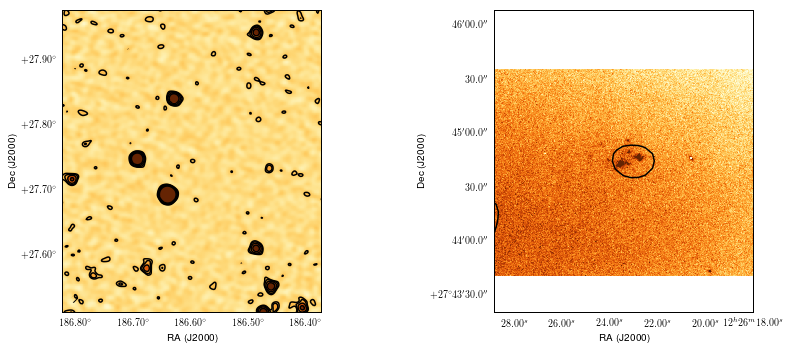

In [31]:
#Now I can work on plotting!
#Plus also comparing to NVSS

#First a quick plot: RC image,  plus Halpha image with RC overlay
#set coordinates of source:
ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'


rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

fig=plt.figure(figsize=(12,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.3,0.7])
f1.recenter(ra,dec, radius=0.2) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear))
f1.show_contour(rcimage,levels=rc_contours,colors='black')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(halpha,figure=fig,aspect='equal',subplot=[0.6,0.15,0.3,0.7])
f2.recenter(ra,dec, radius=0.02) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
f2.show_contour(rcimage,levels=rc_contours,colors='black')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam(rcimage)
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
#f2.tick_labels.set_yformat('ddd.dd')
#f2.tick_labels.set_xformat('ddd.dd')
#f2.add_colorbar()
#f2.colorbar.show()
#f2.colorbar.set_axis_label_text(r'Jy')
#f2.colorbar.set_axis_label_font(size=18, weight='bold')



INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


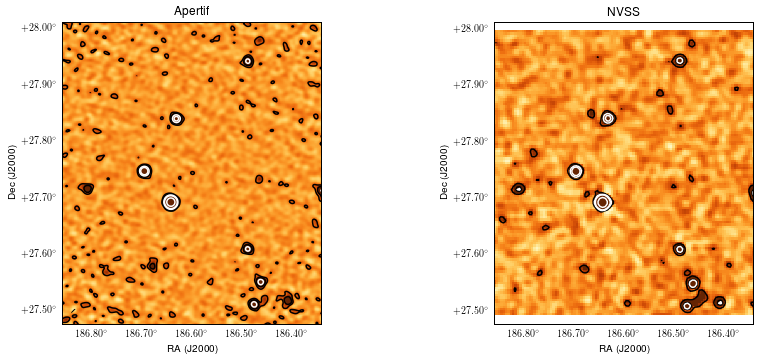

In [46]:
#Now look at NVSS vs Apertif data
#First just plot some comparisons
#Images for both, with contours from other
#Set contours at same absolute level

#Then would like to do a direct source comparison
#talk to Thijs about what he's done

ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'
nvss = '/data/adams/apertif/AGC749237/AGC749237_NVSS.fits'

rc_contours = np.array([3,10]) * 0.2e-3 #0.2 mJy is noise

nvss_contours = np.array([3,10]) * 0.4e-3 #Rms in NVSS images is ~2x

contours = [0.005,0.01,0.05]  #start at 50 mJy and play with contours by hand

fig=plt.figure(figsize=(12,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.3,0.7])
f1.recenter(ra,dec, radius=0.23) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f1.show_contour(rcimage,levels=rc_contours,colors='black')
f1.show_contour(rcimage,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
f1.set_title('Apertif')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(nvss,figure=fig,aspect='equal',subplot=[0.6,0.15,0.3,0.7])
f2.recenter(ra,dec, radius=0.23) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f2.show_contour(nvss,levels=nvss_contours,colors='black')
f2.show_contour(nvss,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam()
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
f2.tick_labels.set_yformat('ddd.dd')
f2.tick_labels.set_xformat('ddd.dd')
f2.set_title('NVSS')



In [ ]:
#want to roughly get flux of source.
#Zoom in in kvis and do s to get max value - should be flux (peak flux is flux, I think/hope)
#answer is: 0.76 mJy, so almost 4sigm (3.8)

INFO: Auto-setting vmin to  6.684e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.439e+01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


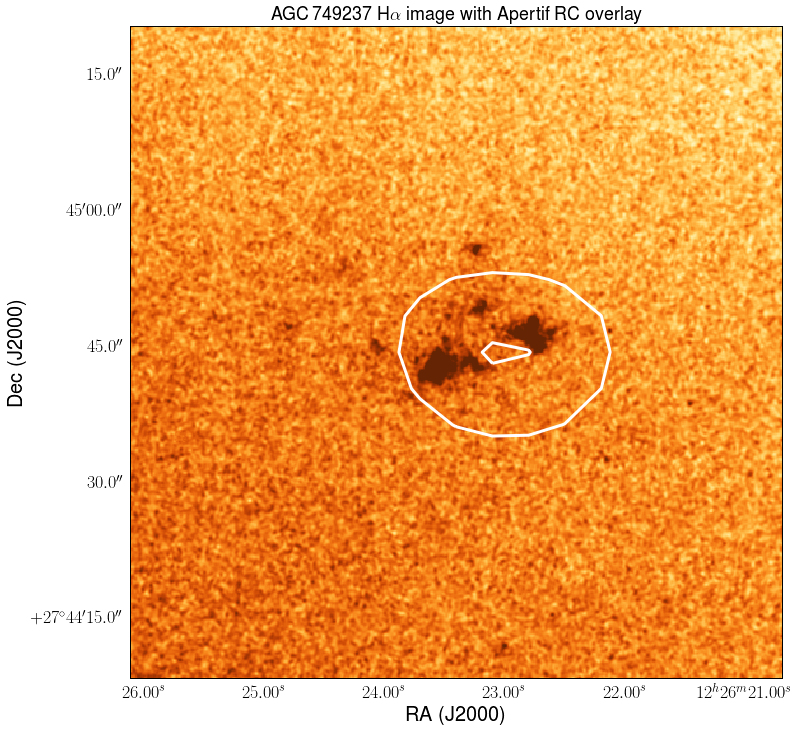

In [41]:
#make just a nice H-alpha RC overlay to focus on that

ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'


rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

rc_contours = [0.0006,0.00075]

fig=plt.figure(figsize=(12,12))

f2=aplpy.FITSFigure(halpha,figure=fig,aspect='equal')
f2.recenter(ra,dec, radius=0.01) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
f2.show_contour(rcimage,levels=rc_contours,colors='white',linewidths=3)
f2.set_title(r'AGC\,749237 H$\alpha$ image with Apertif RC overlay',size=18)
f2.axis_labels.set_font(size=20)
f2.tick_labels.set_font(size=18)

plt.savefig('AGC749237_SF.png')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to  6.684e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.439e+01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


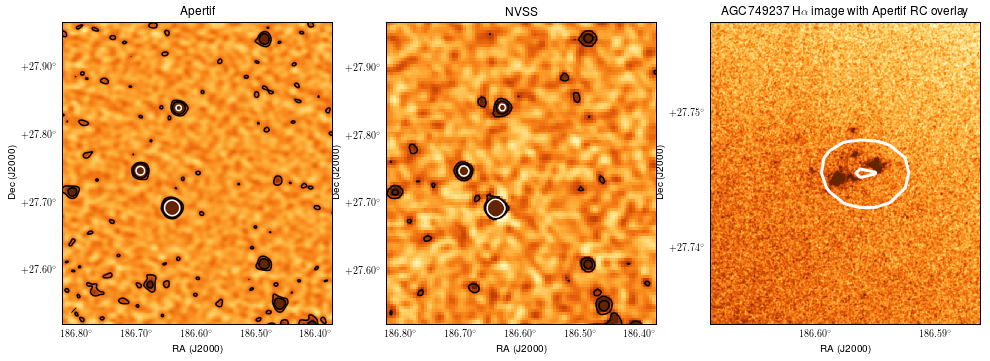

In [44]:
ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'
nvss = '/data/adams/apertif/AGC749237/AGC749237_NVSS.fits'

rc_contours = np.array([3,10]) * 0.2e-3 #0.2 mJy is noise

nvss_contours = np.array([3,10]) * 0.4e-3 #Rms in NVSS images is ~2x

contours = [0.01]  #start at 50 mJy and play with contours by hand

fig=plt.figure(figsize=(15,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.25,0.7])
f1.recenter(ra,dec, radius=0.2) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f1.show_contour(rcimage,levels=rc_contours,colors='black')
f1.show_contour(rcimage,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
f1.set_title('Apertif')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(nvss,figure=fig,aspect='equal',subplot=[0.4,0.15,0.25,0.7])
f2.recenter(ra,dec, radius=0.2) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f2.show_contour(nvss,levels=nvss_contours,colors='black')
f2.show_contour(nvss,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam()
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
f2.tick_labels.set_yformat('ddd.dd')
f2.tick_labels.set_xformat('ddd.dd')
f2.set_title('NVSS')

rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

rc_contours = [0.0006,0.00075]



f3=aplpy.FITSFigure(halpha,figure=fig,aspect='equal',subplot=[0.7,0.15,0.25,0.7])
f3.recenter(ra,dec, radius=0.01) 
f3.show_colorscale(cmap=plt.get_cmap(cm_linear))
f3.show_contour(rcimage,levels=rc_contours,colors='white',linewidths=3)
f3.set_title(r'AGC\,749237 H$\alpha$ image with Apertif RC overlay')
#f3.axis_labels.set_font(size=20)
#f3.tick_labels.set_font(size=18)
f3.tick_labels.set_yformat('ddd.dd')
f3.tick_labels.set_xformat('ddd.dd')


plt.savefig('agc749237.png')

In [ ]:
#Now I would like to actually measure continuum sources
#Both for comparison but also because I want a good measure of the flux of my "detection"

#want to use PyBDSF